## PreProcessing Step
### the following issues need to be handled
1. some images are inverted (white is used for font and black for background unlike the majority)
2. light differs (you need to binarize and enhance the image quality)



In [1]:
from preprocessing import *
from feature_extraction import *
import torch
from torch import nn, optim
from nn_utils import nn_train, nn_predict, nn_accuracy

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
classes = ['diwani', 'naskh', 'parsi', 'rekaa', 'thuluth', 'maghribi', 'kufi', 'mohakek', 'Squar-kufic']

In [181]:
X, Y = load_data()
print(X.shape)
print(Y.shape)
print(X[0])
print(Y[0])

(1684,)
(1684,)
ACdata_base/1/0001.jpg
1


In [243]:
split_data(X, Y)

In [242]:
t = np.genfromtxt('data/train_labels.csv')
print(t.shape)

(1010,)


(76, 347)
The ground-truth value of this image is:  Squar-kufic


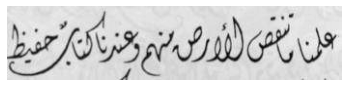

In [4]:
random_index = np.random.randint(0, 1683)

# Plot the image.
print(X[random_index].shape)
plt.imshow(X[random_index], 'gray')
plt.axis("off")

print("The ground-truth value of this image is: ",
      classes[Y[random_index]-1])

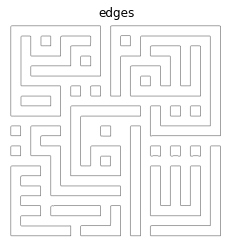

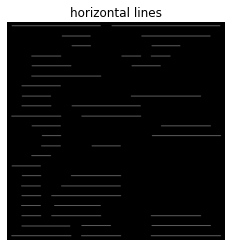

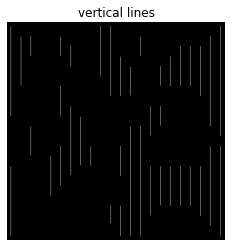

number of horizontal lines:44
number of vertical lines:40


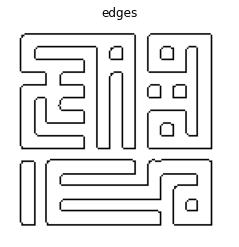

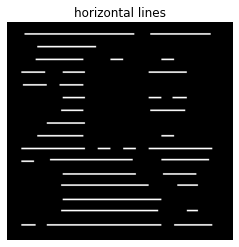

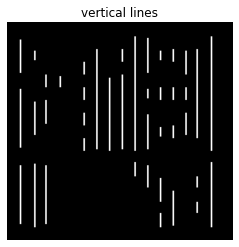

number of horizontal lines:36
number of vertical lines:41


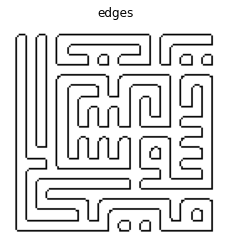

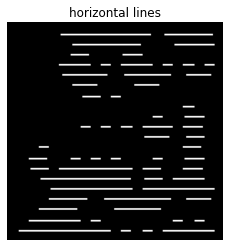

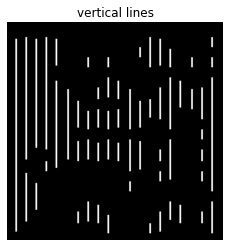

number of horizontal lines:59
number of vertical lines:60


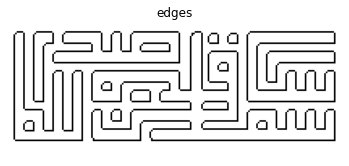

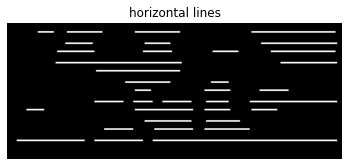

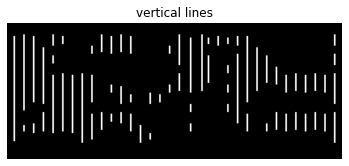

number of horizontal lines:36
number of vertical lines:70


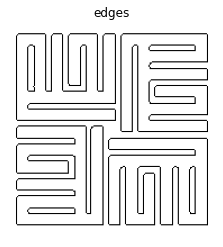

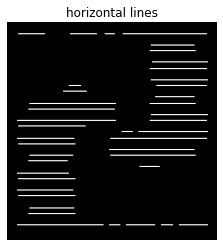

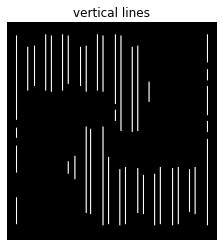

number of horizontal lines:41
number of vertical lines:41


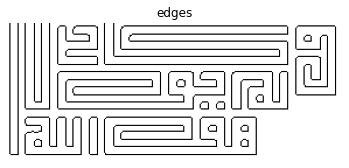

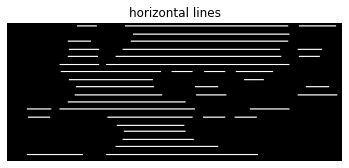

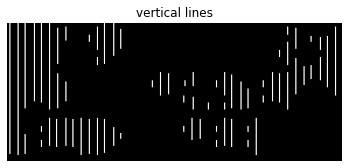

number of horizontal lines:40
number of vertical lines:70


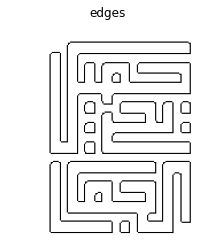

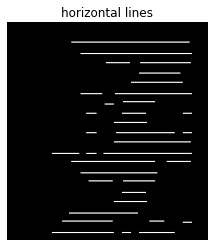

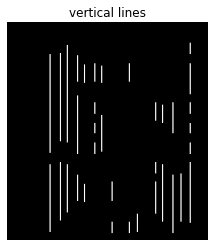

number of horizontal lines:35
number of vertical lines:36


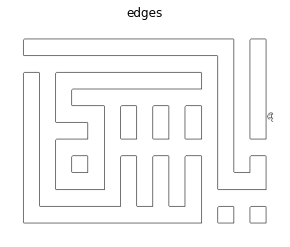

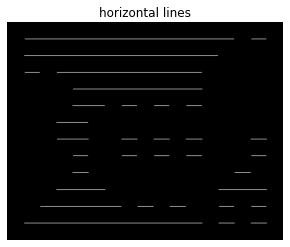

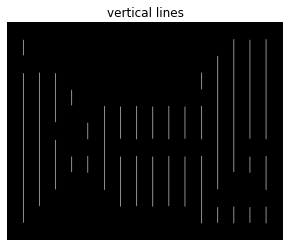

number of horizontal lines:33
number of vertical lines:33


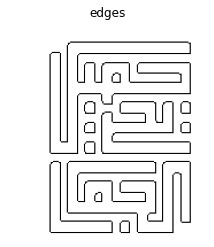

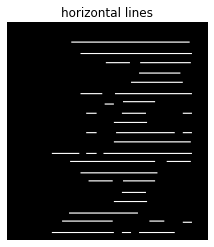

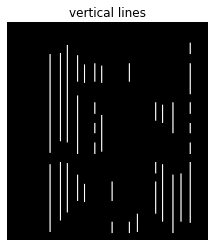

number of horizontal lines:35
number of vertical lines:36


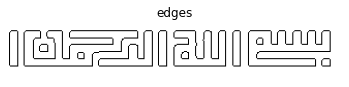

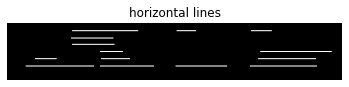

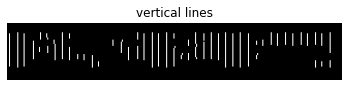

number of horizontal lines:14
number of vertical lines:54


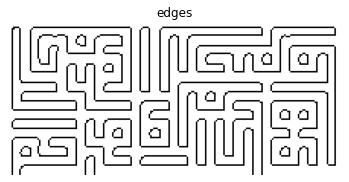

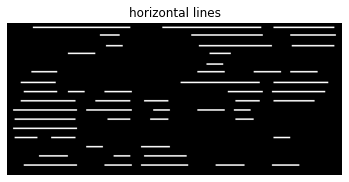

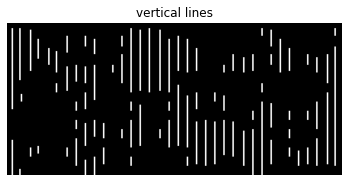

number of horizontal lines:52
number of vertical lines:90


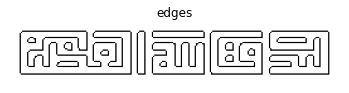

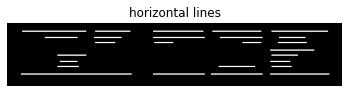

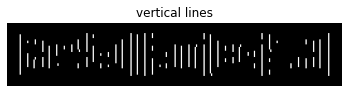

number of horizontal lines:26
number of vertical lines:63


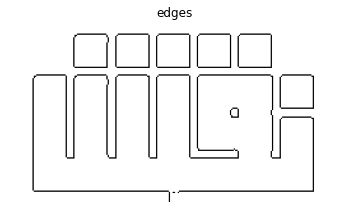

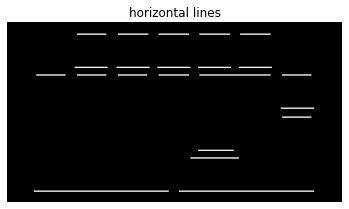

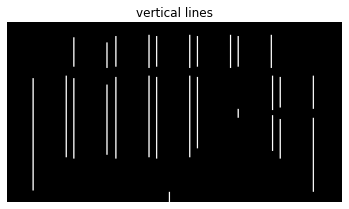

number of horizontal lines:22
number of vertical lines:27


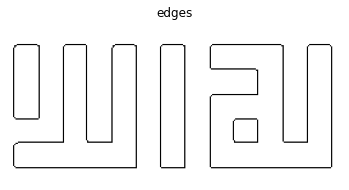

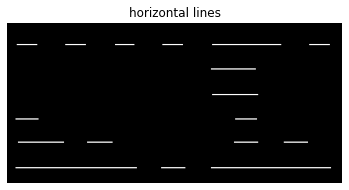

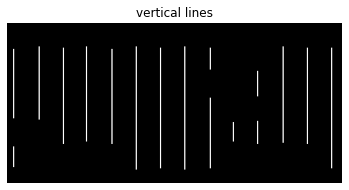

number of horizontal lines:17
number of vertical lines:17


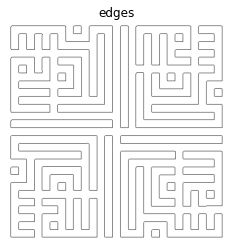

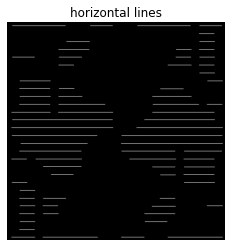

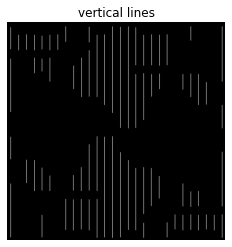

number of horizontal lines:74
number of vertical lines:74


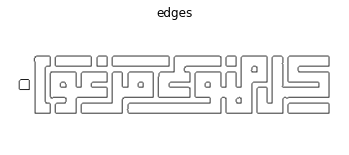

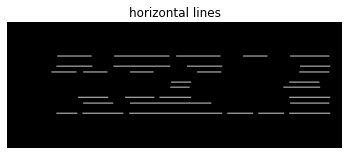

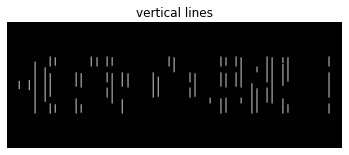

number of horizontal lines:31
number of vertical lines:55


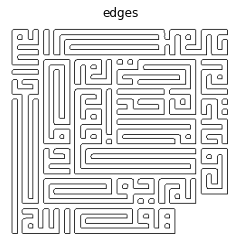

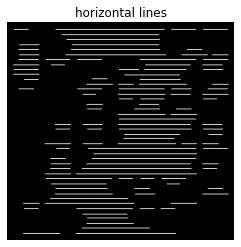

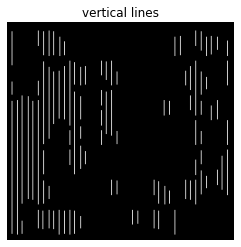

number of horizontal lines:113
number of vertical lines:98


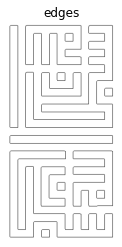

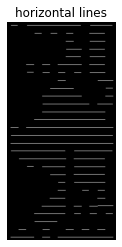

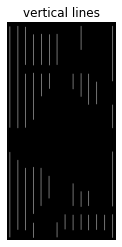

number of horizontal lines:68
number of vertical lines:37


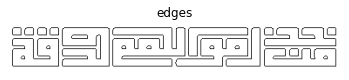

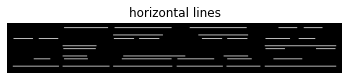

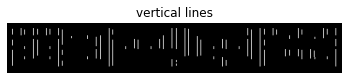

number of horizontal lines:35
number of vertical lines:76


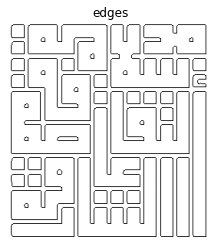

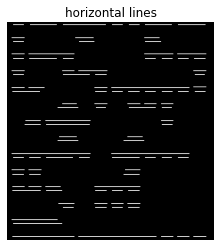

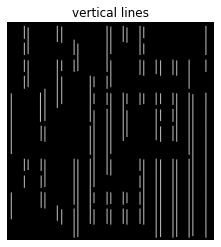

number of horizontal lines:104
number of vertical lines:98


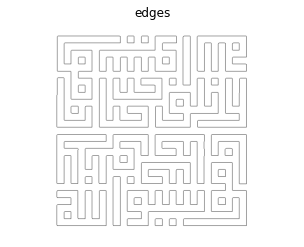

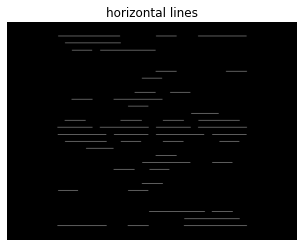

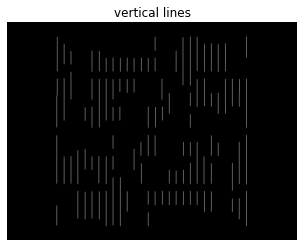

number of horizontal lines:46
number of vertical lines:104


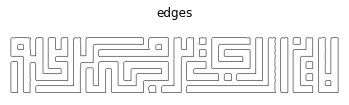

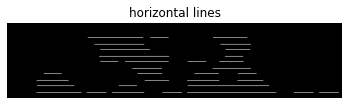

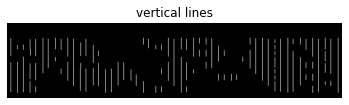

number of horizontal lines:33
number of vertical lines:99


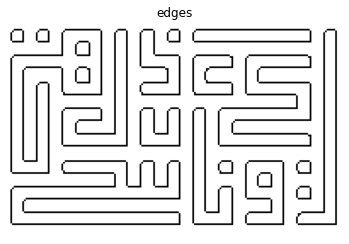

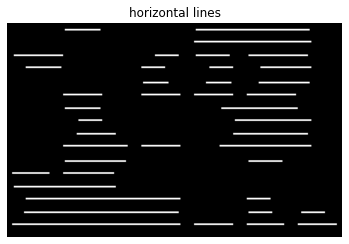

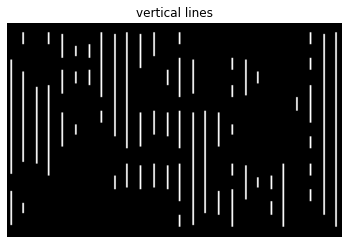

number of horizontal lines:41
number of vertical lines:62


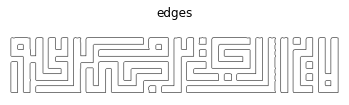

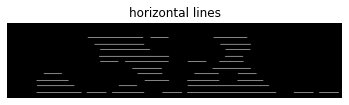

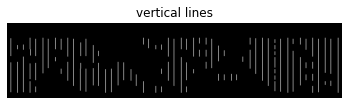

number of horizontal lines:33
number of vertical lines:97


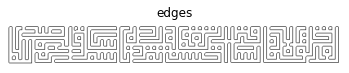

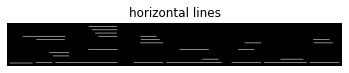

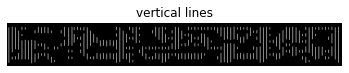

number of horizontal lines:27
number of vertical lines:257


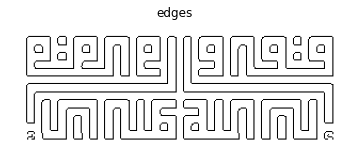

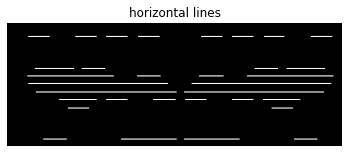

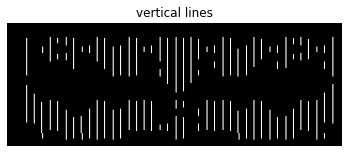

number of horizontal lines:32
number of vertical lines:91


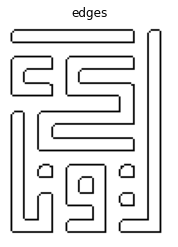

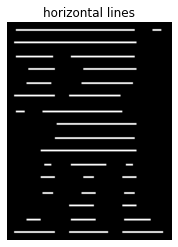

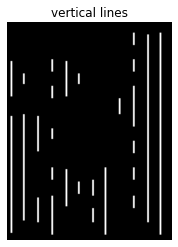

number of horizontal lines:33
number of vertical lines:27


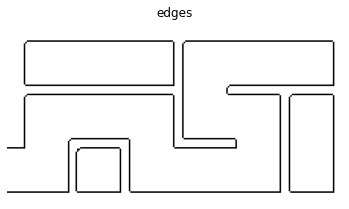

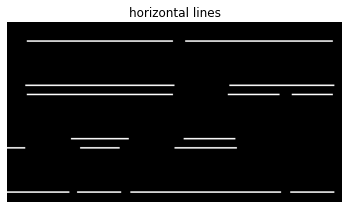

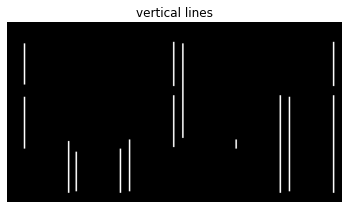

number of horizontal lines:16
number of vertical lines:14


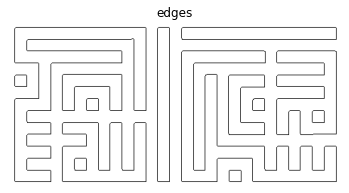

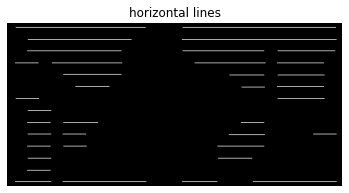

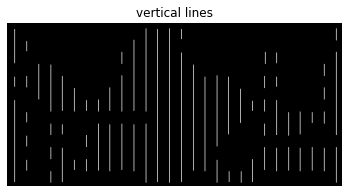

number of horizontal lines:37
number of vertical lines:68


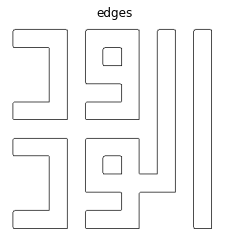

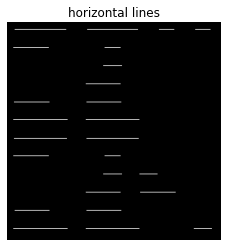

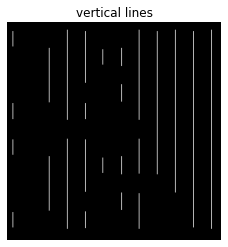

number of horizontal lines:25
number of vertical lines:25


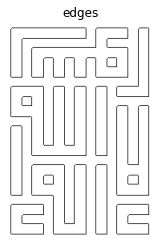

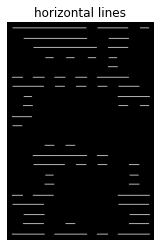

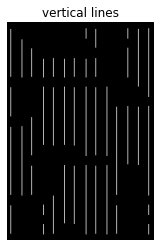

number of horizontal lines:55
number of vertical lines:43


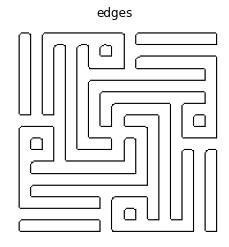

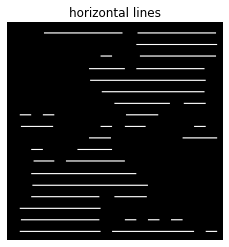

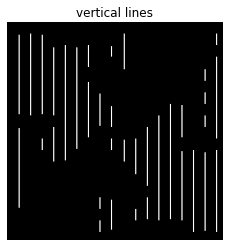

number of horizontal lines:36
number of vertical lines:36


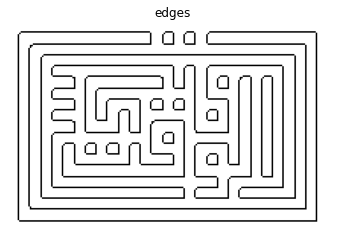

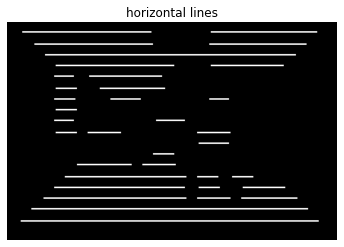

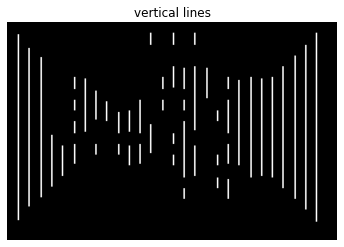

number of horizontal lines:35
number of vertical lines:50


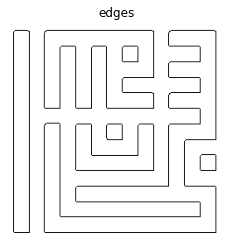

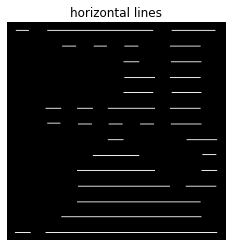

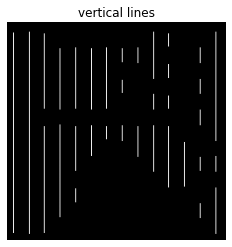

number of horizontal lines:34
number of vertical lines:34


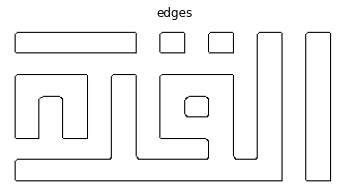

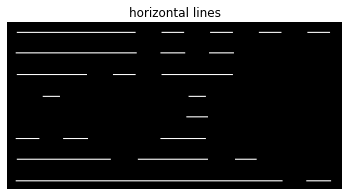

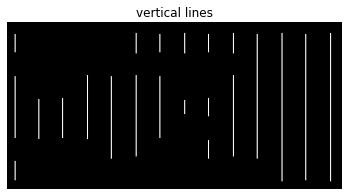

number of horizontal lines:22
number of vertical lines:22


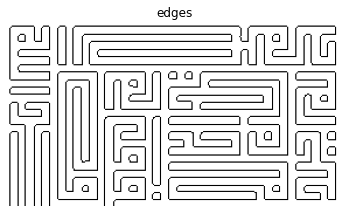

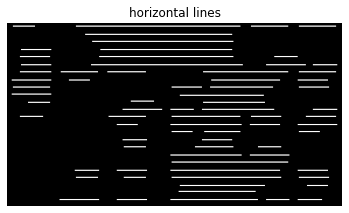

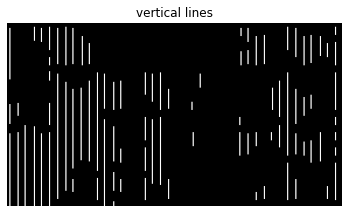

number of horizontal lines:73
number of vertical lines:90


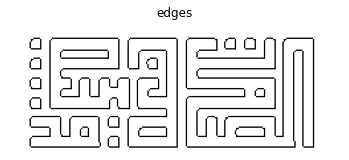

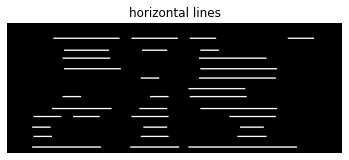

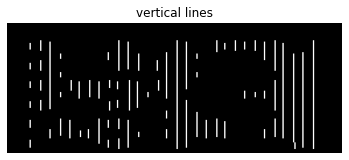

number of horizontal lines:33
number of vertical lines:72


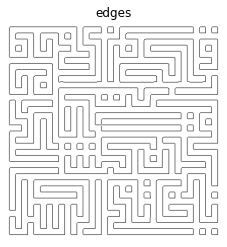

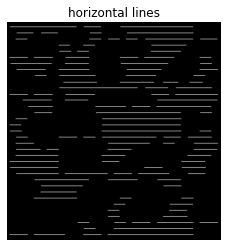

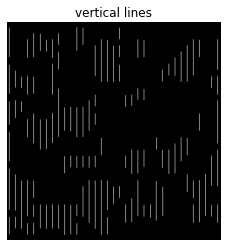

number of horizontal lines:120
number of vertical lines:117


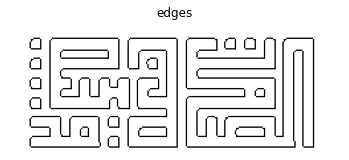

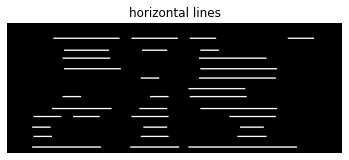

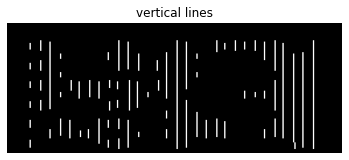

number of horizontal lines:33
number of vertical lines:72


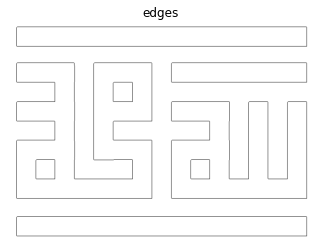

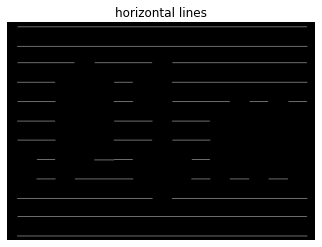

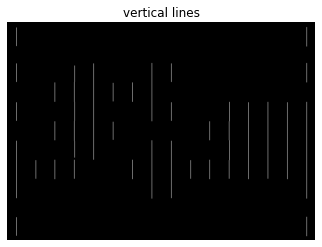

number of horizontal lines:31
number of vertical lines:32


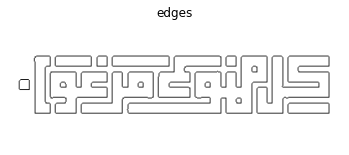

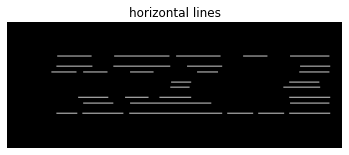

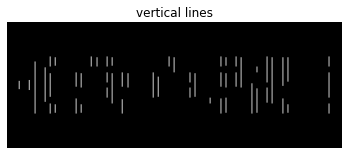

number of horizontal lines:31
number of vertical lines:53


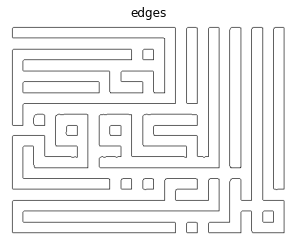

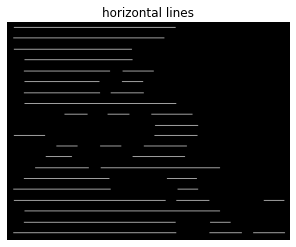

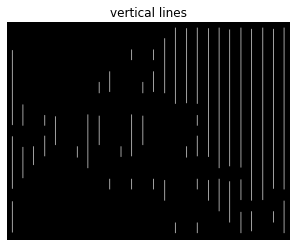

number of horizontal lines:37
number of vertical lines:51


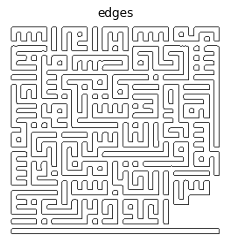

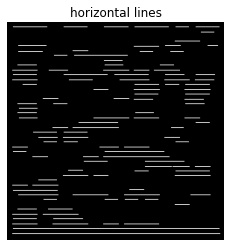

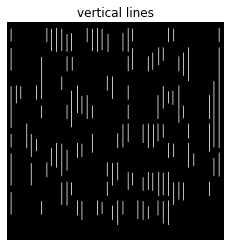

number of horizontal lines:118
number of vertical lines:120


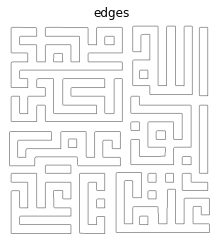

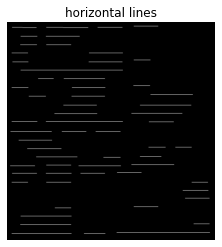

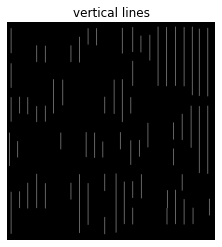

number of horizontal lines:60
number of vertical lines:68


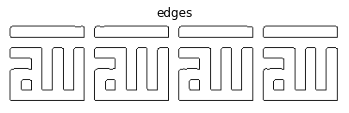

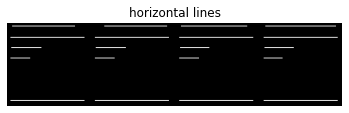

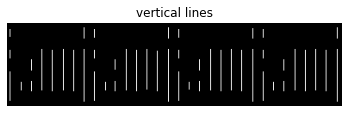

number of horizontal lines:20
number of vertical lines:48


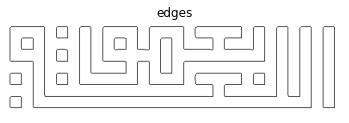

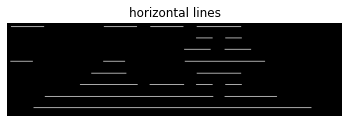

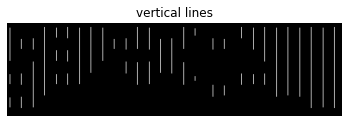

number of horizontal lines:20
number of vertical lines:47


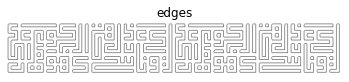

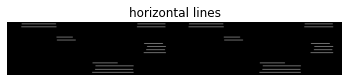

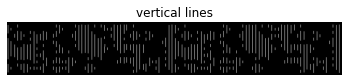

number of horizontal lines:28
number of vertical lines:271


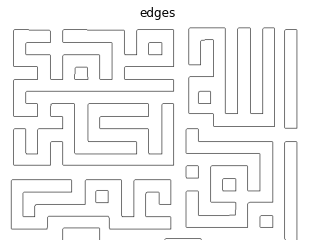

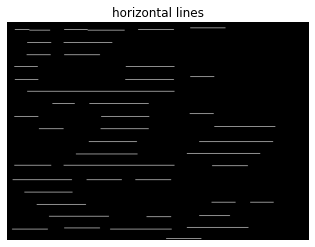

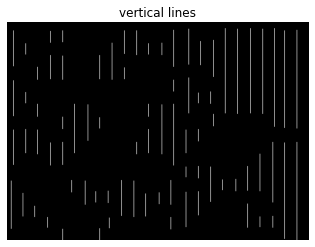

number of horizontal lines:44
number of vertical lines:81


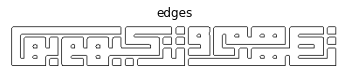

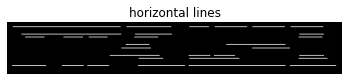

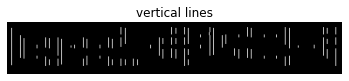

number of horizontal lines:31
number of vertical lines:78


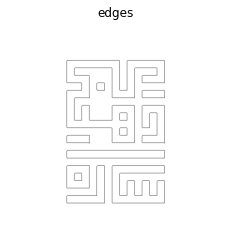

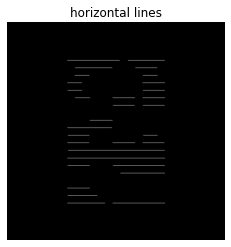

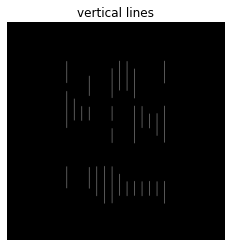

number of horizontal lines:31
number of vertical lines:30


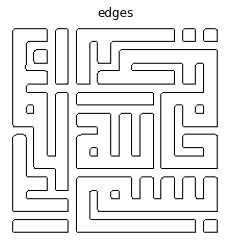

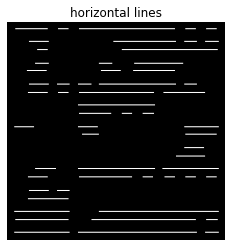

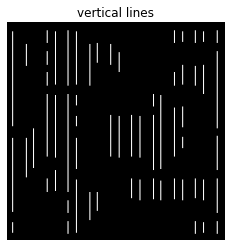

number of horizontal lines:57
number of vertical lines:62


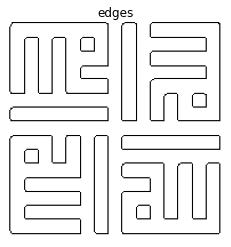

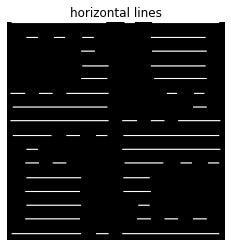

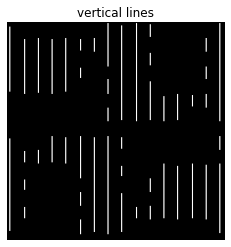

number of horizontal lines:48
number of vertical lines:47


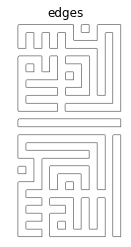

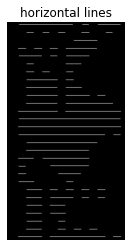

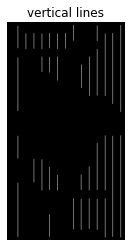

number of horizontal lines:68
number of vertical lines:37


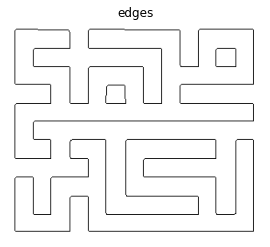

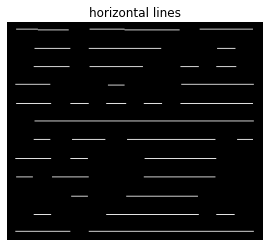

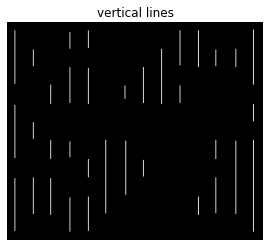

number of horizontal lines:36
number of vertical lines:35


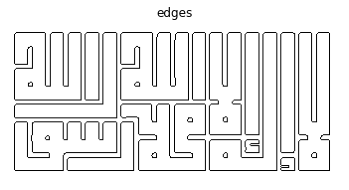

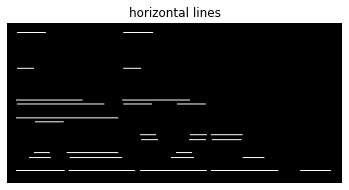

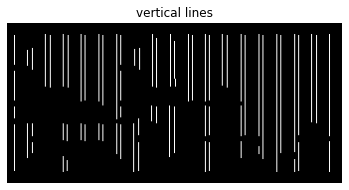

number of horizontal lines:29
number of vertical lines:71


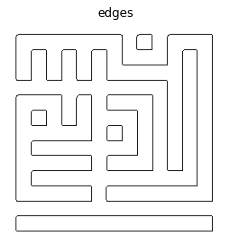

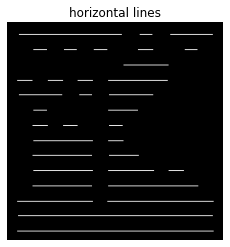

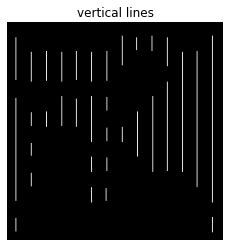

number of horizontal lines:34
number of vertical lines:34


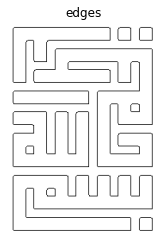

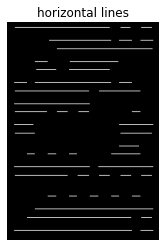

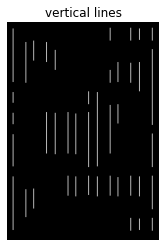

number of horizontal lines:47
number of vertical lines:42


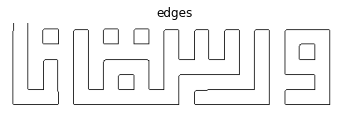

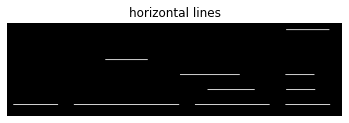

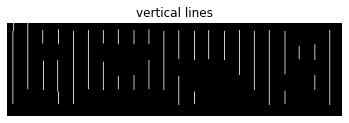

number of horizontal lines:10
number of vertical lines:32


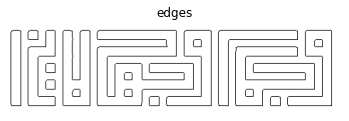

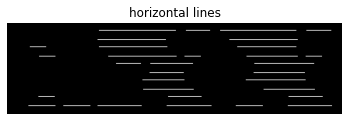

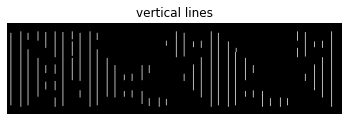

number of horizontal lines:32
number of vertical lines:63


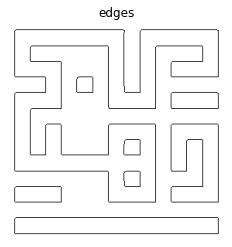

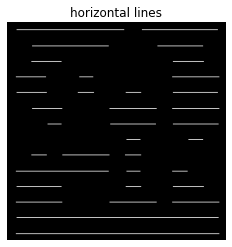

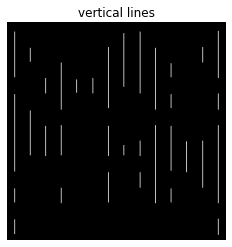

number of horizontal lines:35
number of vertical lines:34


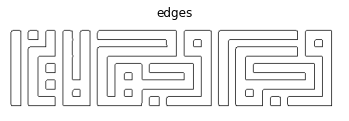

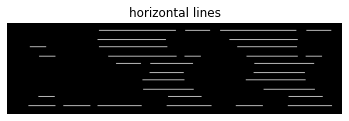

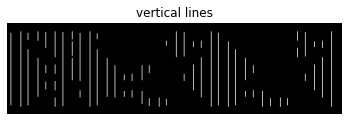

number of horizontal lines:32
number of vertical lines:63


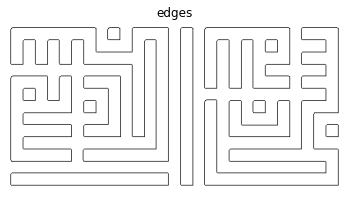

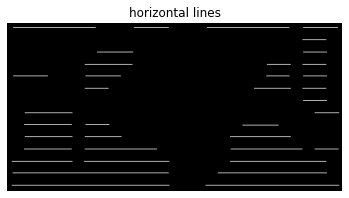

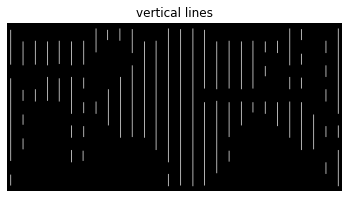

number of horizontal lines:37
number of vertical lines:68


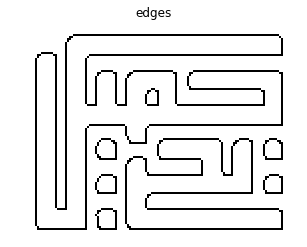

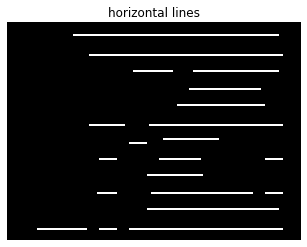

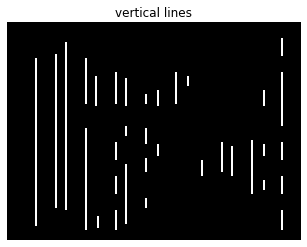

number of horizontal lines:21
number of vertical lines:34


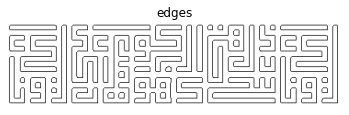

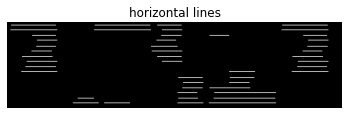

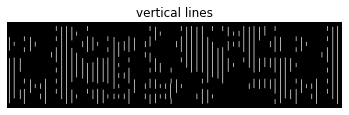

number of horizontal lines:47
number of vertical lines:163


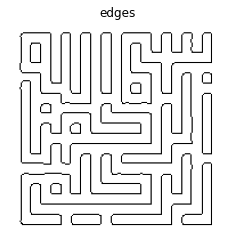

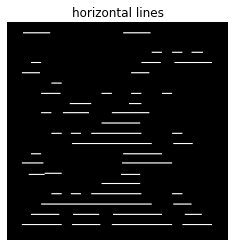

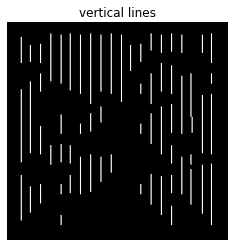

number of horizontal lines:48
number of vertical lines:64


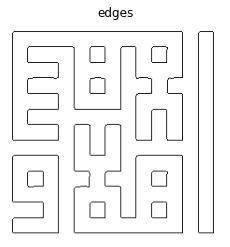

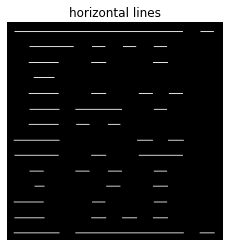

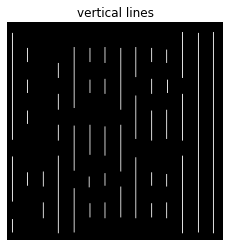

number of horizontal lines:43
number of vertical lines:47


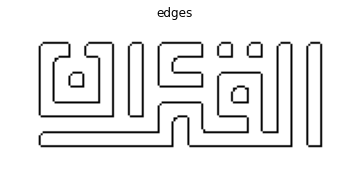

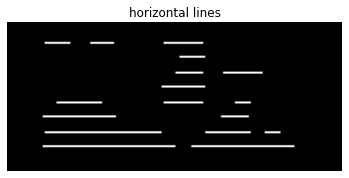

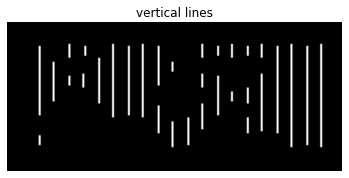

number of horizontal lines:17
number of vertical lines:32


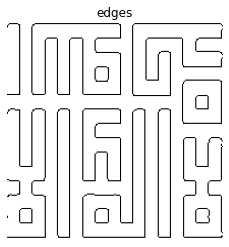

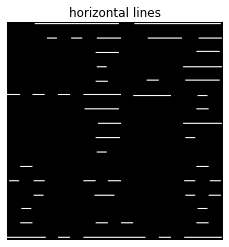

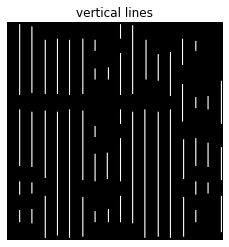

number of horizontal lines:50
number of vertical lines:54


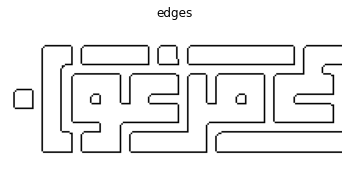

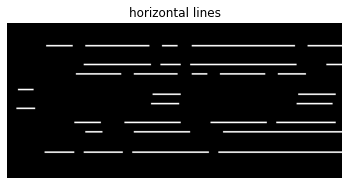

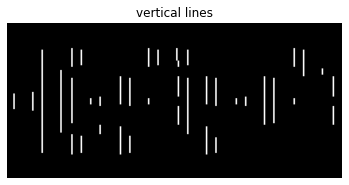

number of horizontal lines:31
number of vertical lines:38


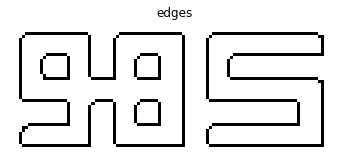

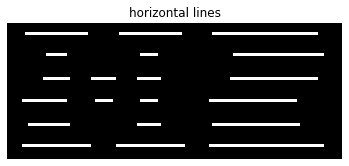

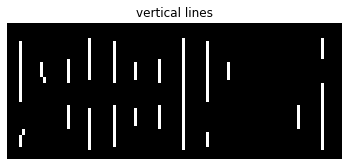

number of horizontal lines:20
number of vertical lines:20


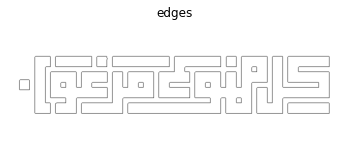

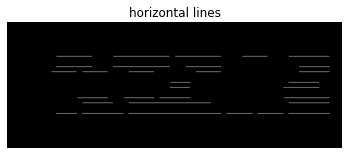

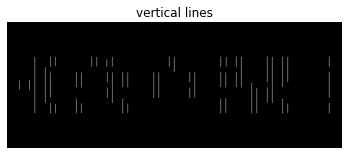

number of horizontal lines:31
number of vertical lines:52


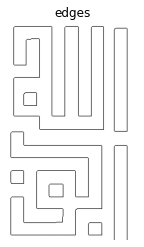

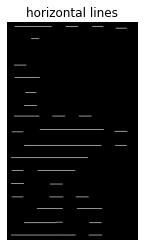

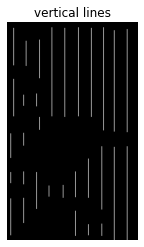

number of horizontal lines:31
number of vertical lines:31


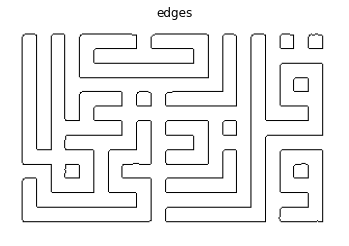

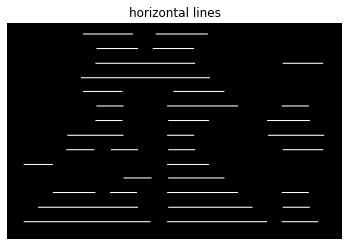

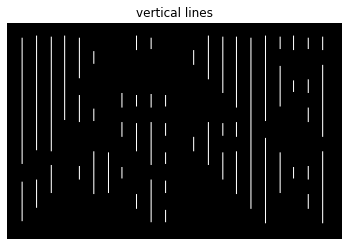

number of horizontal lines:36
number of vertical lines:57


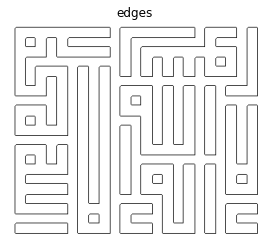

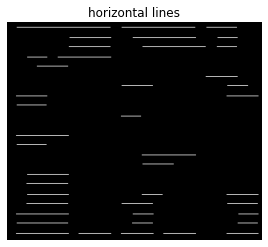

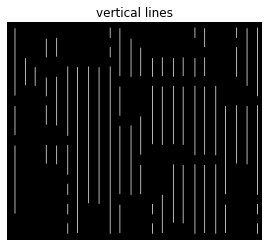

number of horizontal lines:42
number of vertical lines:66


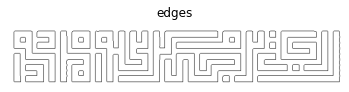

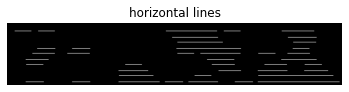

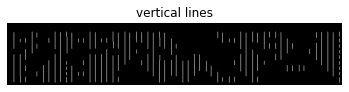

number of horizontal lines:41
number of vertical lines:112


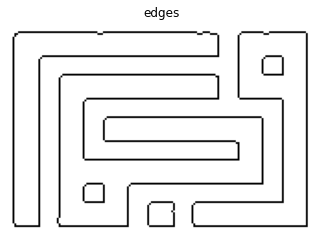

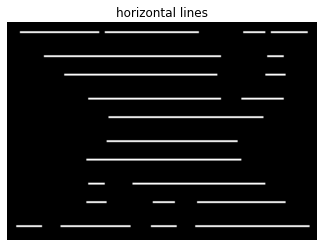

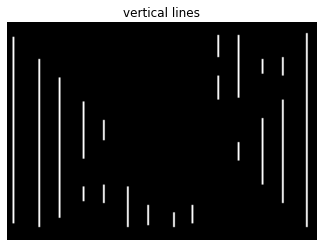

number of horizontal lines:22
number of vertical lines:20


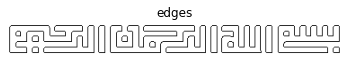

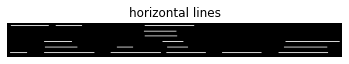

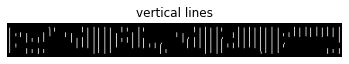

number of horizontal lines:18
number of vertical lines:74


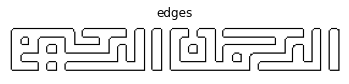

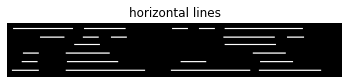

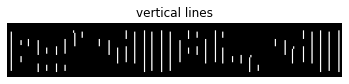

number of horizontal lines:23
number of vertical lines:46


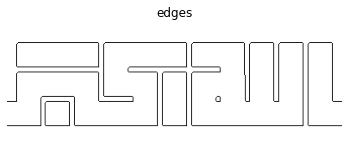

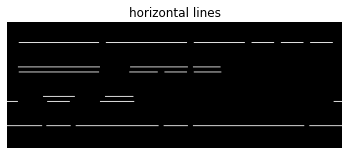

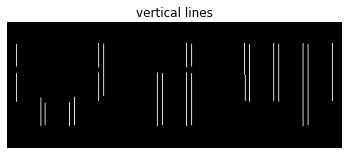

number of horizontal lines:25
number of vertical lines:22


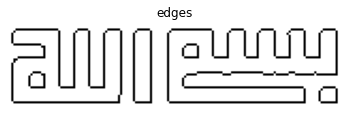

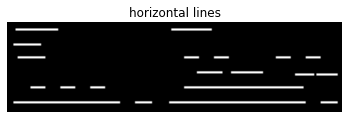

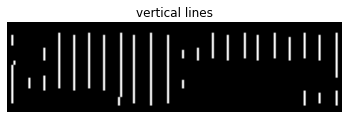

number of horizontal lines:20
number of vertical lines:28


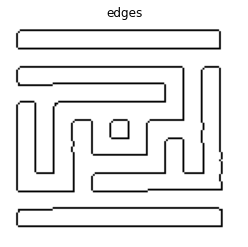

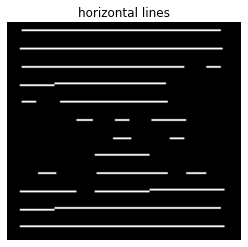

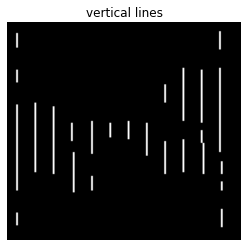

number of horizontal lines:20
number of vertical lines:24


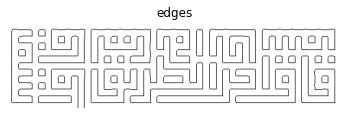

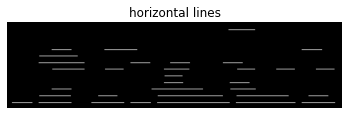

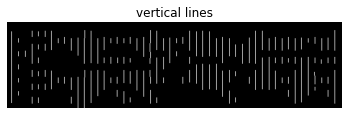

number of horizontal lines:33
number of vertical lines:134


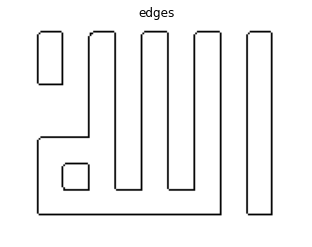

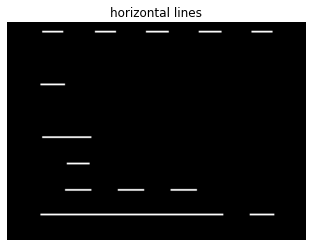

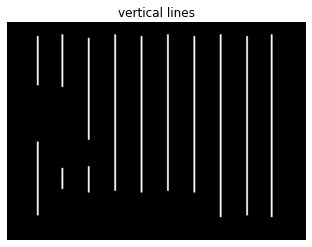

number of horizontal lines:13
number of vertical lines:13


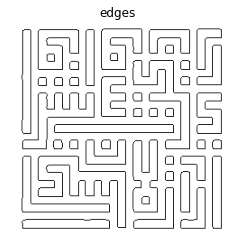

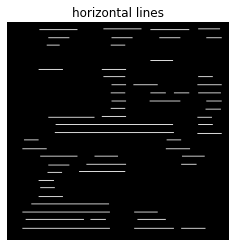

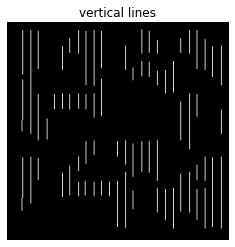

number of horizontal lines:58
number of vertical lines:72


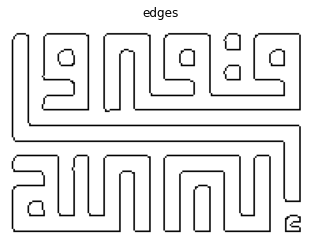

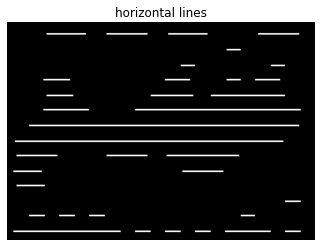

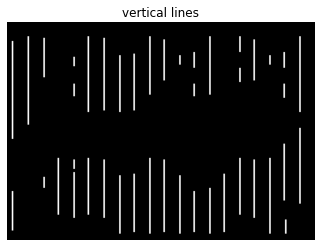

number of horizontal lines:35
number of vertical lines:43


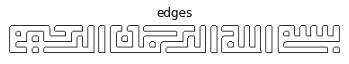

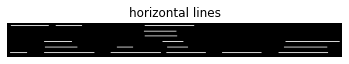

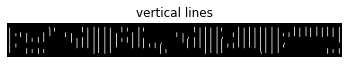

number of horizontal lines:18
number of vertical lines:74


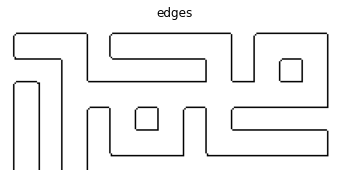

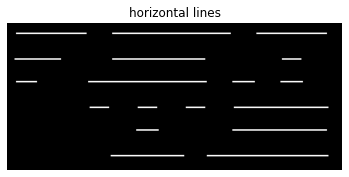

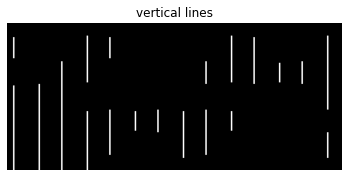

number of horizontal lines:18
number of vertical lines:20


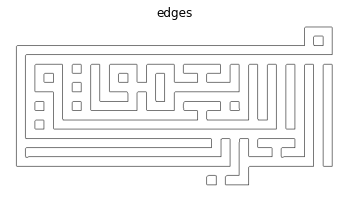

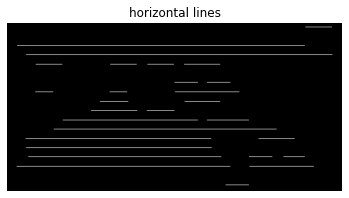

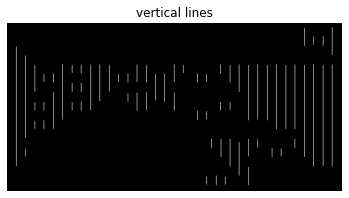

number of horizontal lines:28
number of vertical lines:69


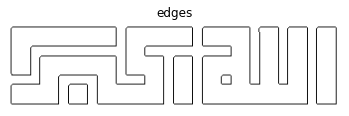

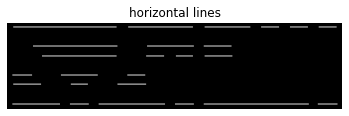

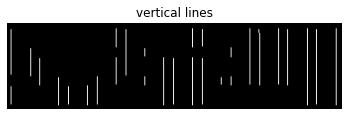

number of horizontal lines:25
number of vertical lines:29


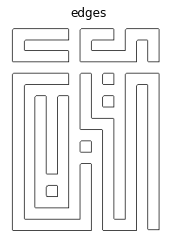

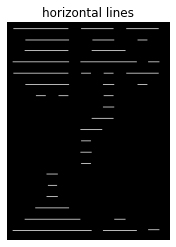

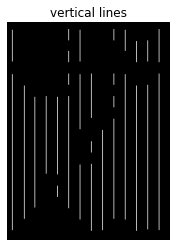

number of horizontal lines:36
number of vertical lines:30


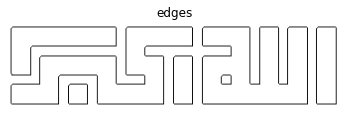

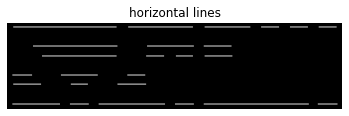

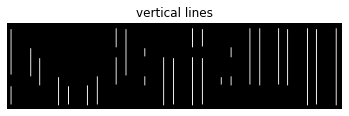

number of horizontal lines:25
number of vertical lines:29


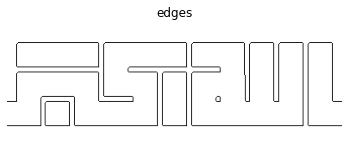

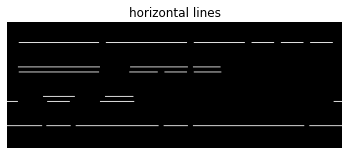

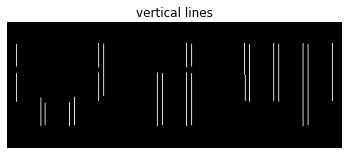

number of horizontal lines:25
number of vertical lines:22


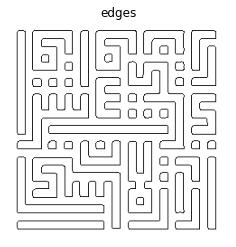

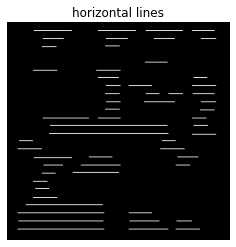

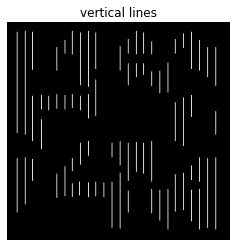

number of horizontal lines:58
number of vertical lines:73


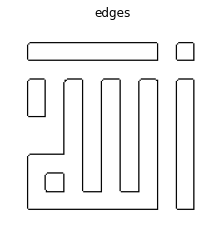

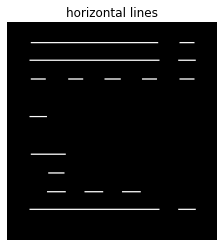

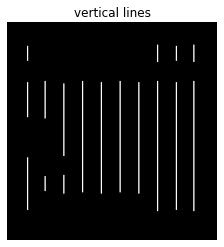

number of horizontal lines:17
number of vertical lines:17


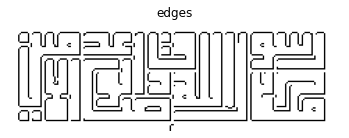

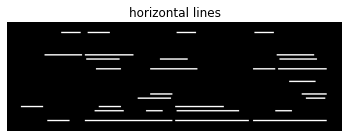

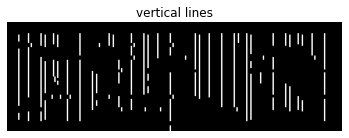

number of horizontal lines:30
number of vertical lines:89


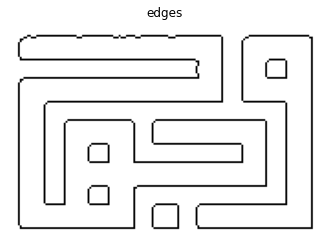

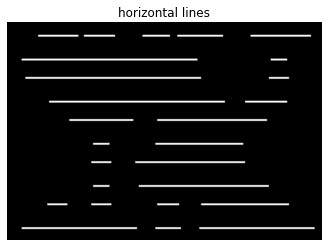

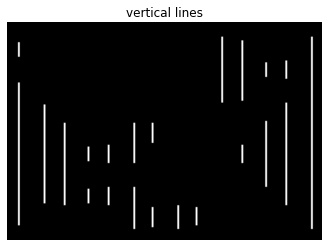

number of horizontal lines:26
number of vertical lines:22


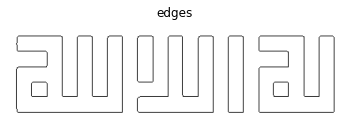

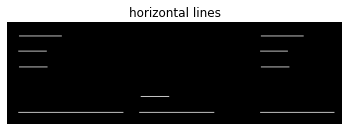

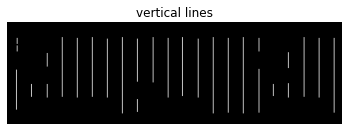

number of horizontal lines:10
number of vertical lines:28


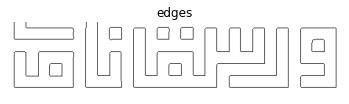

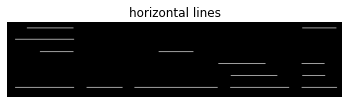

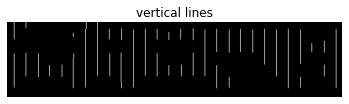

number of horizontal lines:14
number of vertical lines:41


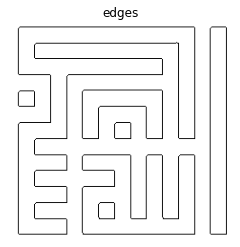

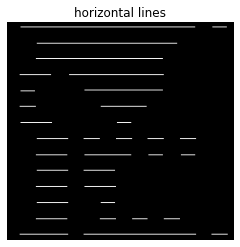

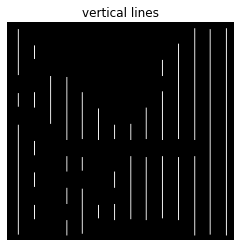

number of horizontal lines:34
number of vertical lines:34


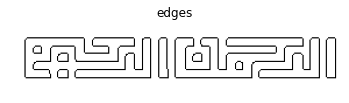

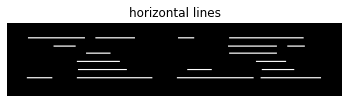

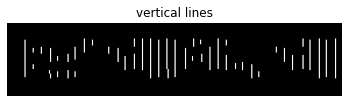

number of horizontal lines:18
number of vertical lines:46


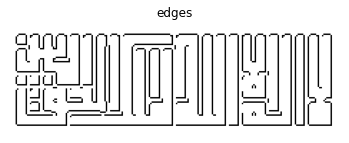

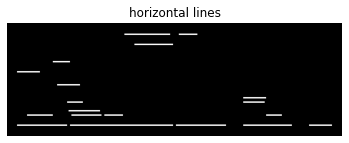

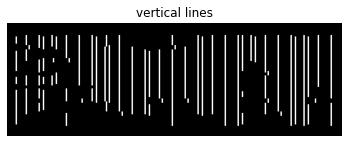

number of horizontal lines:19
number of vertical lines:73


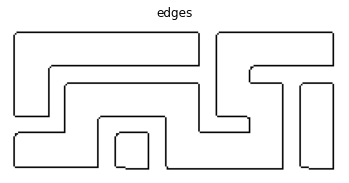

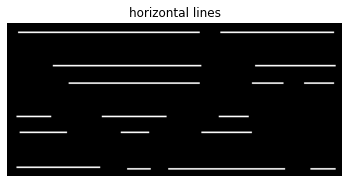

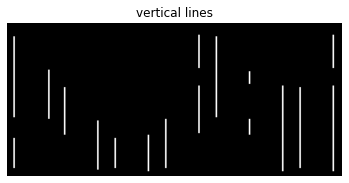

number of horizontal lines:17
number of vertical lines:17


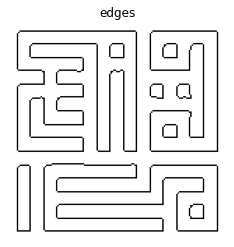

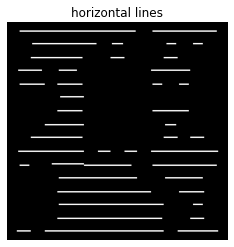

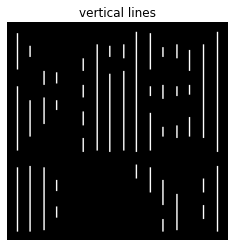

number of horizontal lines:42
number of vertical lines:45


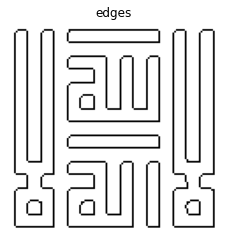

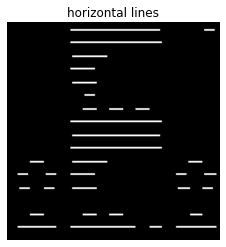

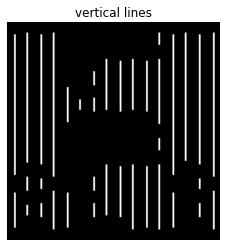

number of horizontal lines:34
number of vertical lines:37


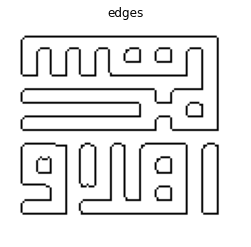

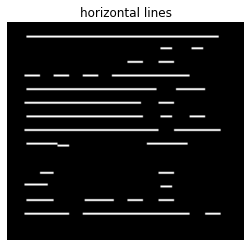

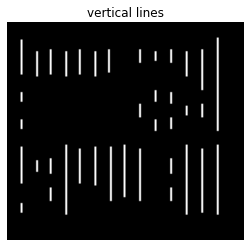

number of horizontal lines:31
number of vertical lines:38


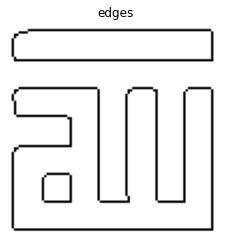

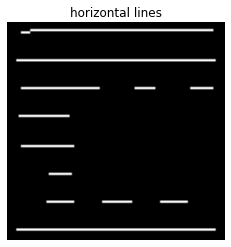

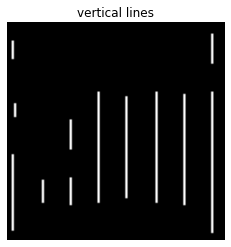

number of horizontal lines:12
number of vertical lines:12


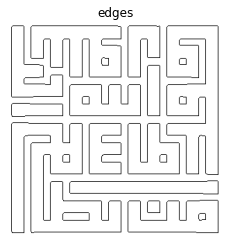

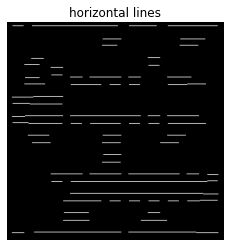

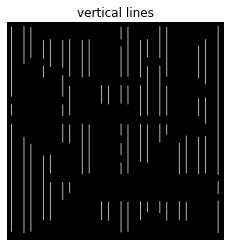

number of horizontal lines:65
number of vertical lines:70


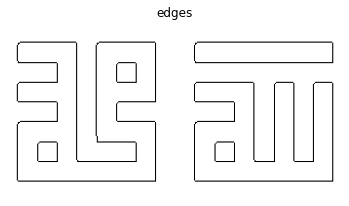

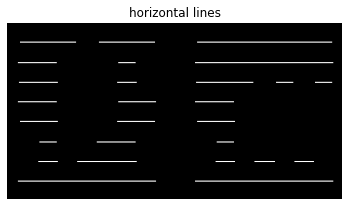

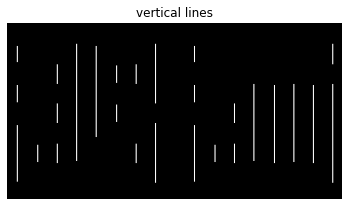

number of horizontal lines:27
number of vertical lines:27


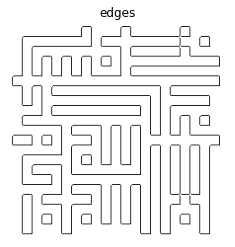

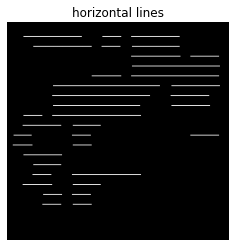

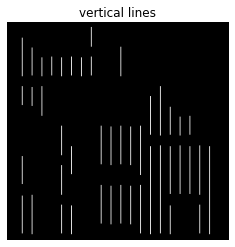

number of horizontal lines:36
number of vertical lines:45


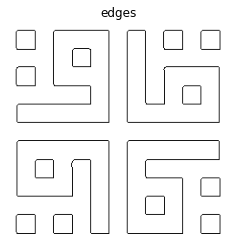

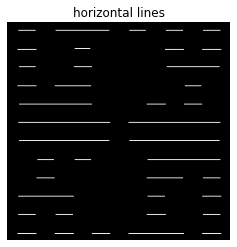

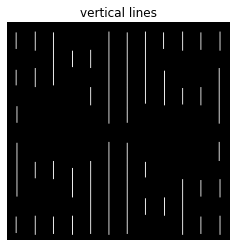

number of horizontal lines:40
number of vertical lines:40


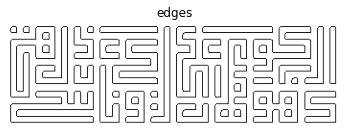

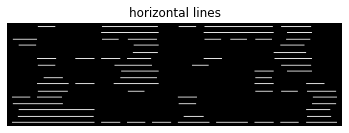

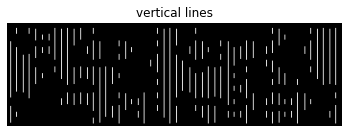

number of horizontal lines:67
number of vertical lines:134


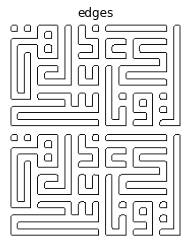

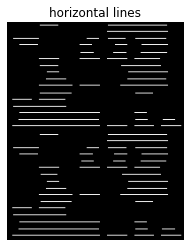

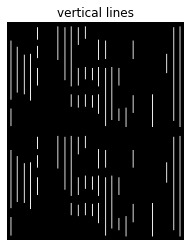

number of horizontal lines:82
number of vertical lines:70


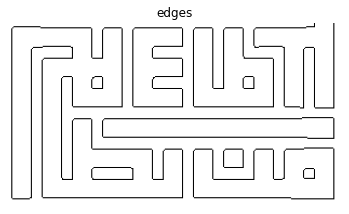

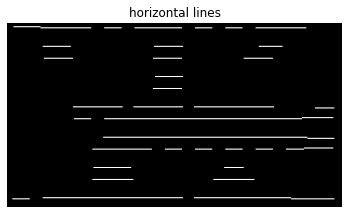

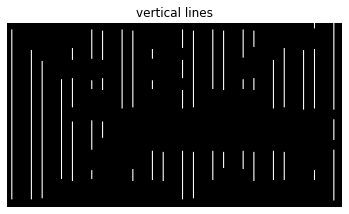

number of horizontal lines:34
number of vertical lines:48


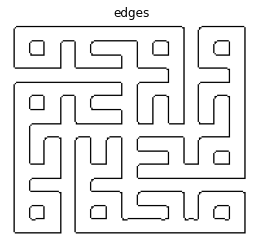

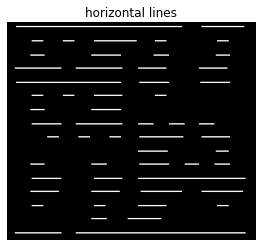

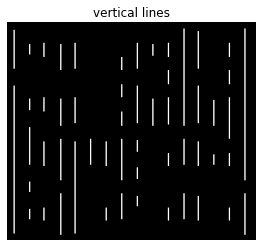

number of horizontal lines:56
number of vertical lines:54


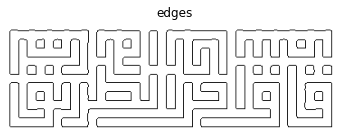

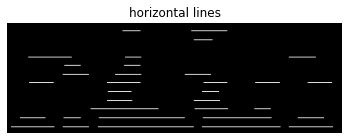

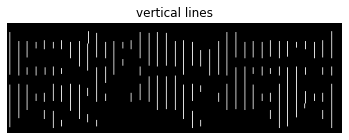

number of horizontal lines:33
number of vertical lines:97


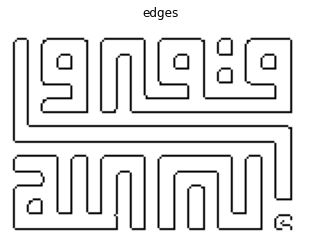

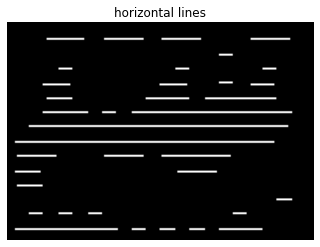

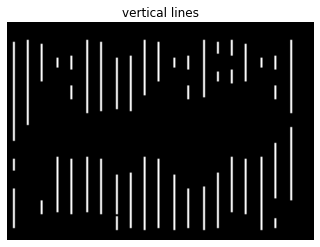

number of horizontal lines:36
number of vertical lines:47


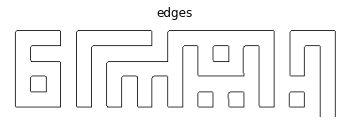

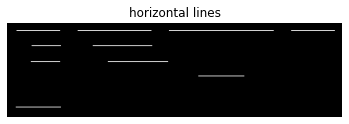

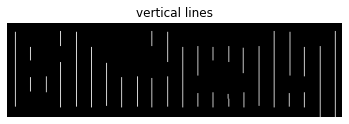

number of horizontal lines:10
number of vertical lines:32


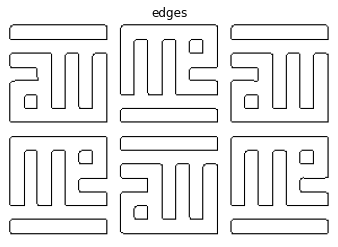

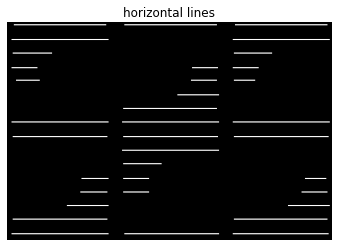

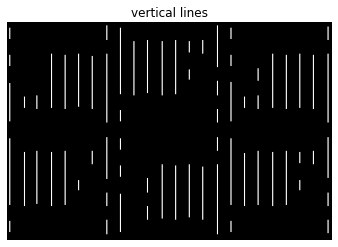

number of horizontal lines:36
number of vertical lines:69


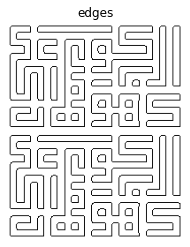

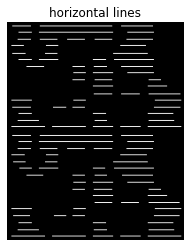

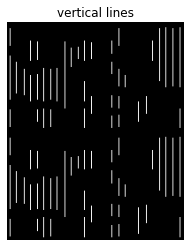

number of horizontal lines:108
number of vertical lines:80


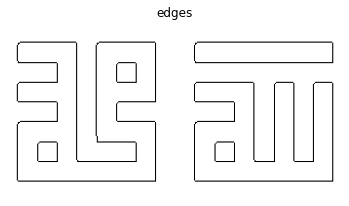

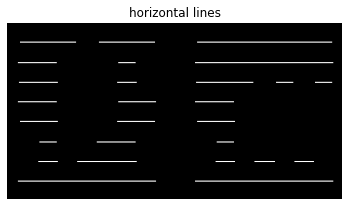

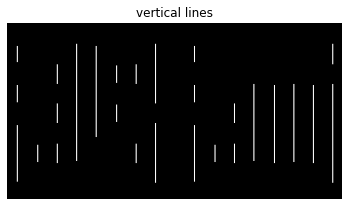

number of horizontal lines:27
number of vertical lines:27


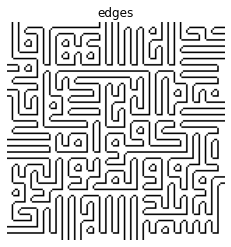

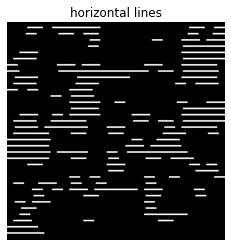

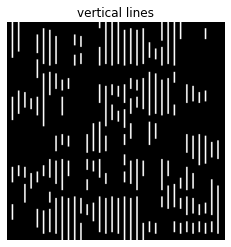

number of horizontal lines:119
number of vertical lines:145


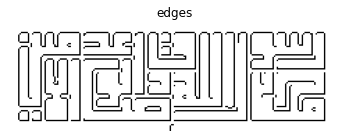

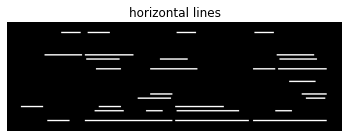

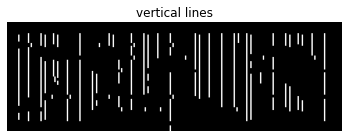

number of horizontal lines:30
number of vertical lines:88


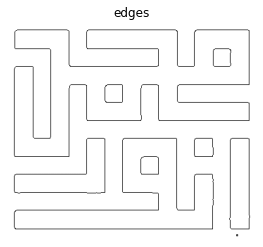

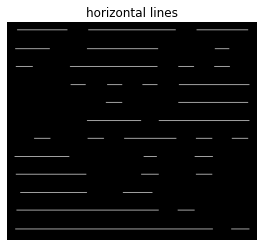

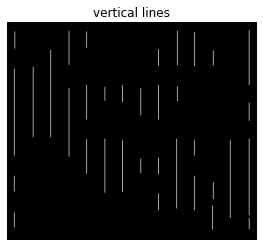

number of horizontal lines:35
number of vertical lines:35


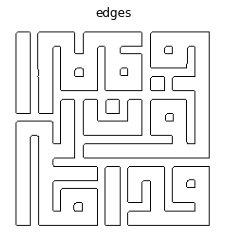

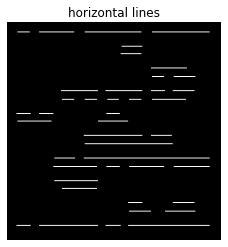

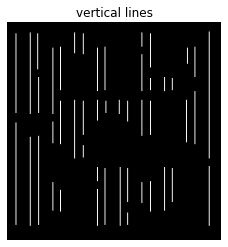

number of horizontal lines:42
number of vertical lines:48


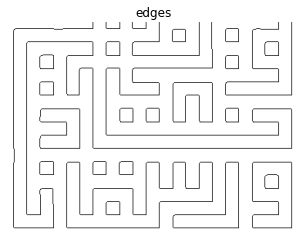

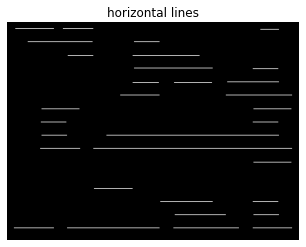

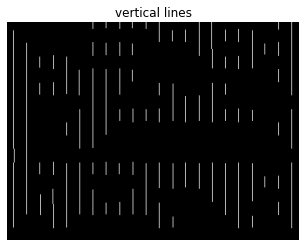

number of horizontal lines:32
number of vertical lines:83


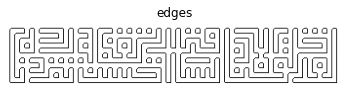

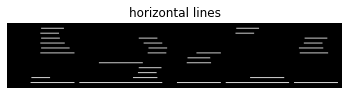

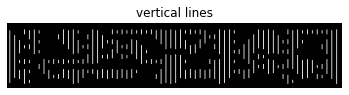

number of horizontal lines:30
number of vertical lines:181


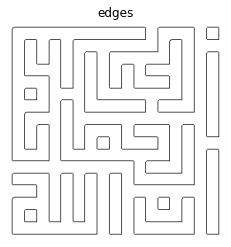

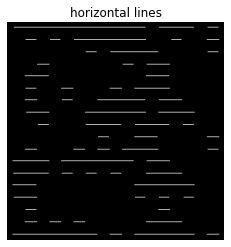

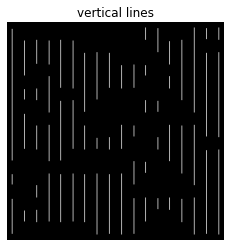

number of horizontal lines:63
number of vertical lines:63


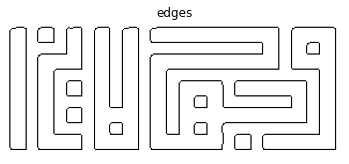

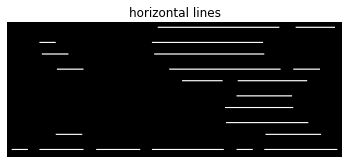

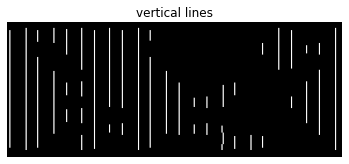

number of horizontal lines:22
number of vertical lines:42


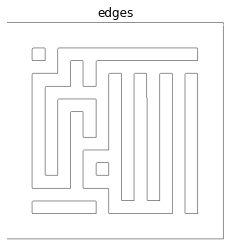

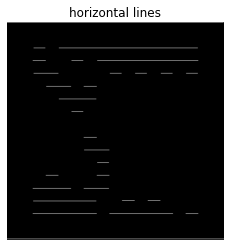

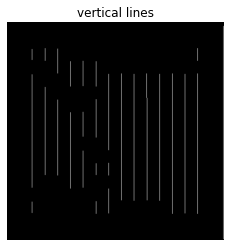

number of horizontal lines:29
number of vertical lines:28


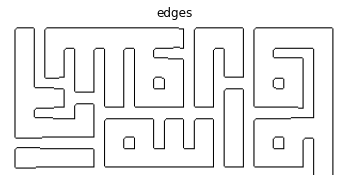

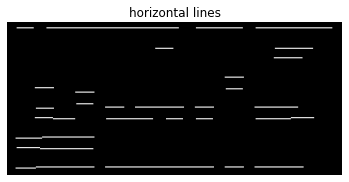

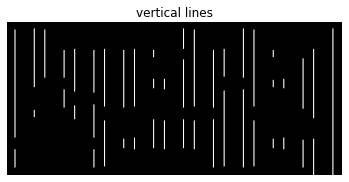

number of horizontal lines:28
number of vertical lines:46


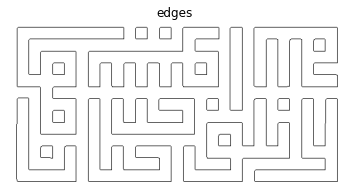

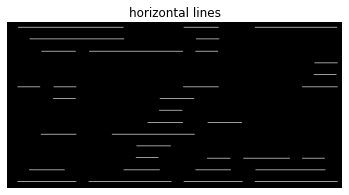

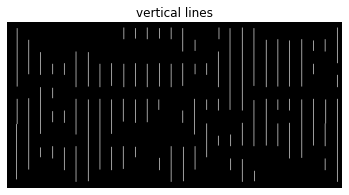

number of horizontal lines:34
number of vertical lines:85


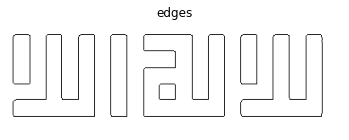

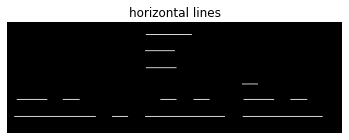

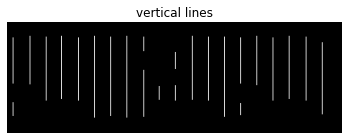

number of horizontal lines:14
number of vertical lines:24


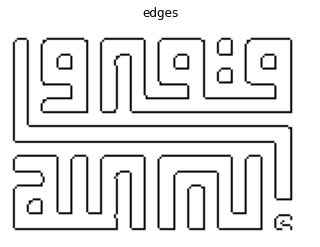

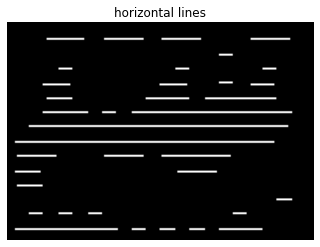

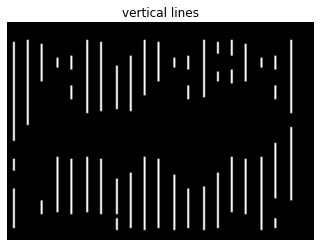

number of horizontal lines:36
number of vertical lines:47


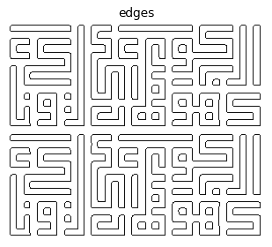

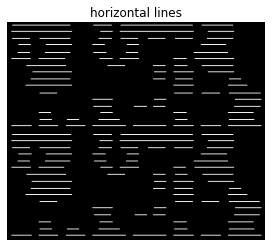

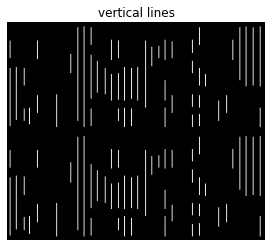

number of horizontal lines:150
number of vertical lines:103


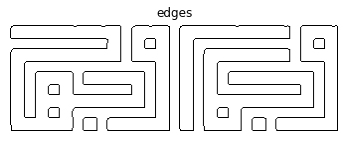

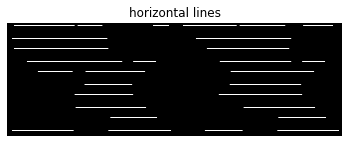

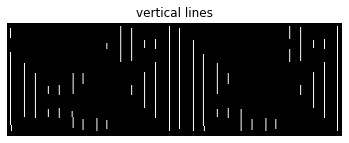

number of horizontal lines:29
number of vertical lines:43


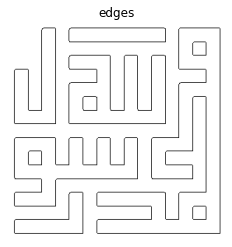

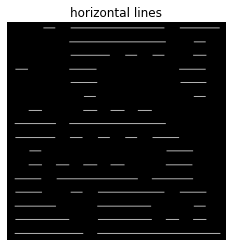

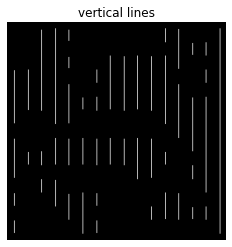

number of horizontal lines:50
number of vertical lines:50


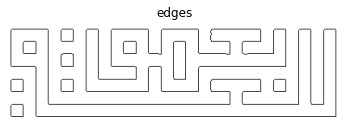

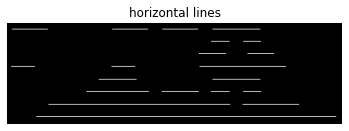

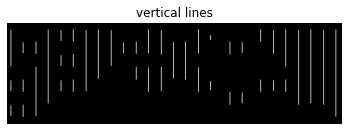

number of horizontal lines:20
number of vertical lines:45


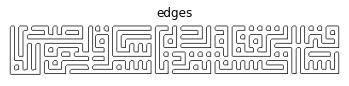

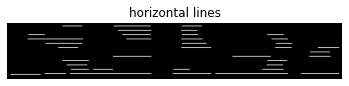

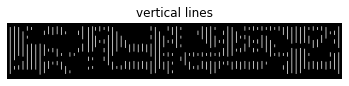

number of horizontal lines:38
number of vertical lines:198


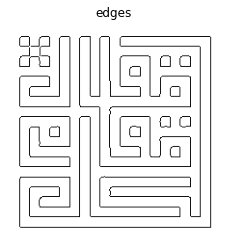

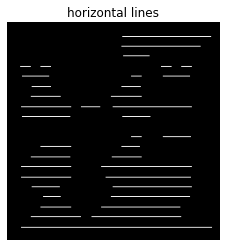

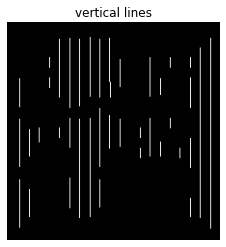

number of horizontal lines:38
number of vertical lines:39


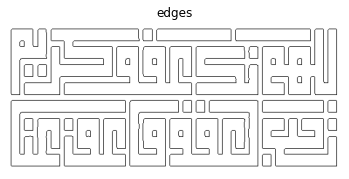

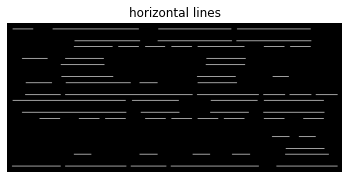

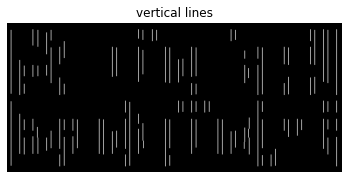

number of horizontal lines:62
number of vertical lines:114


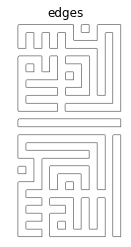

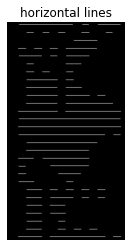

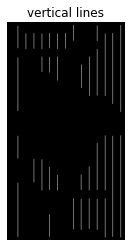

number of horizontal lines:68
number of vertical lines:37


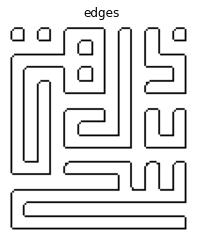

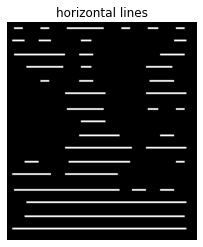

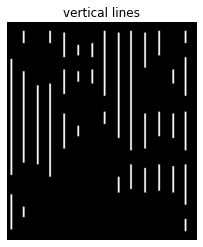

number of horizontal lines:40
number of vertical lines:36


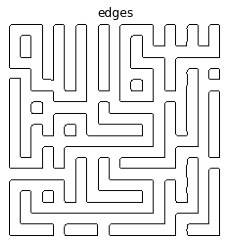

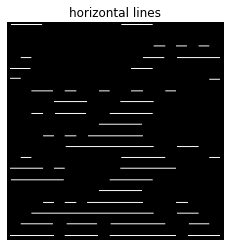

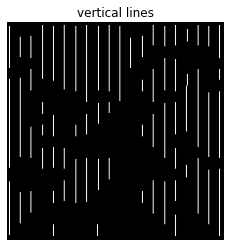

number of horizontal lines:51
number of vertical lines:68


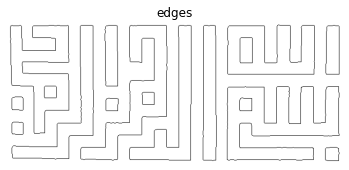

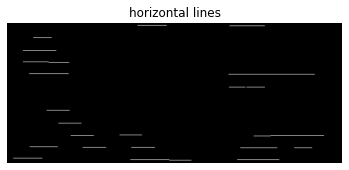

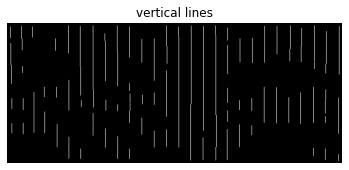

number of horizontal lines:22
number of vertical lines:78


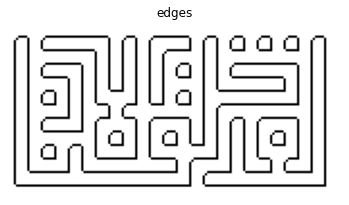

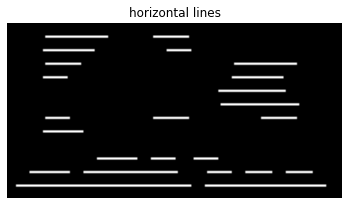

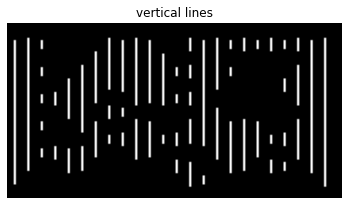

number of horizontal lines:24
number of vertical lines:59


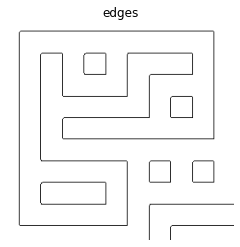

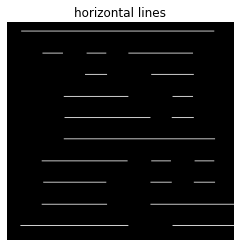

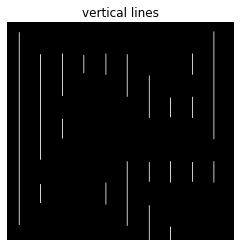

number of horizontal lines:21
number of vertical lines:21


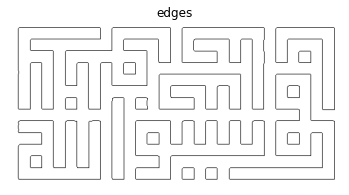

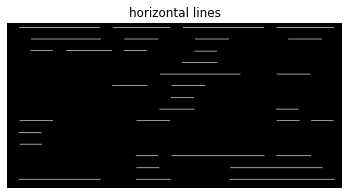

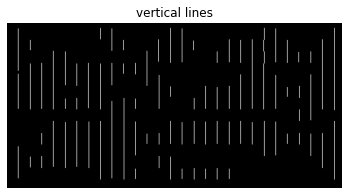

number of horizontal lines:34
number of vertical lines:84


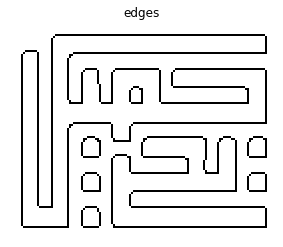

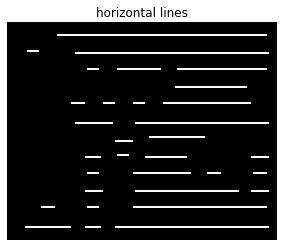

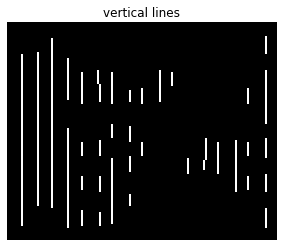

number of horizontal lines:32
number of vertical lines:36


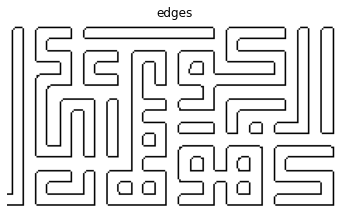

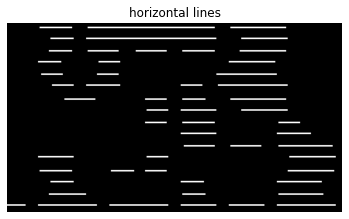

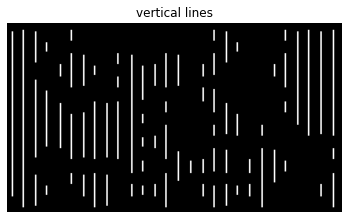

number of horizontal lines:55
number of vertical lines:76


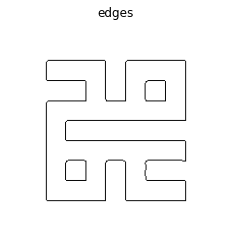

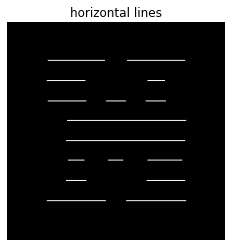

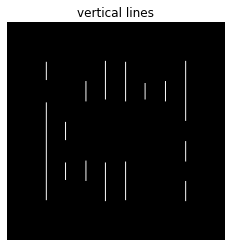

number of horizontal lines:16
number of vertical lines:15


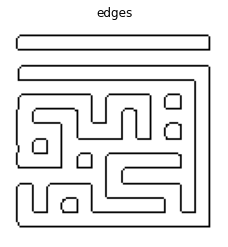

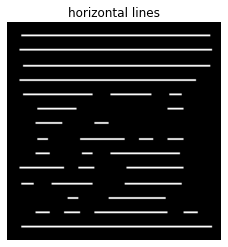

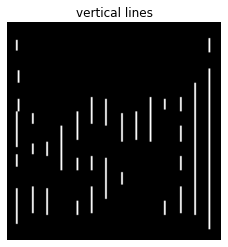

number of horizontal lines:31
number of vertical lines:32


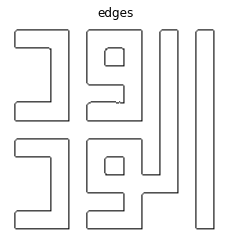

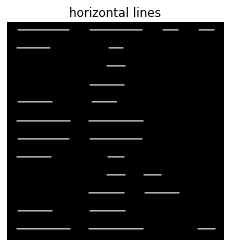

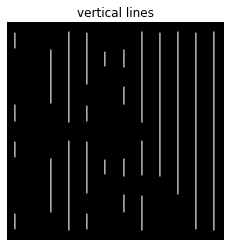

number of horizontal lines:25
number of vertical lines:25


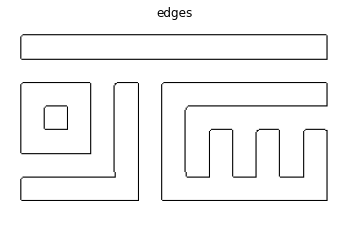

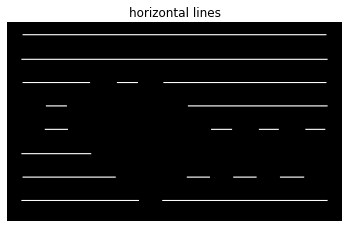

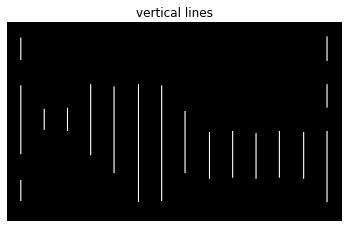

number of horizontal lines:18
number of vertical lines:18


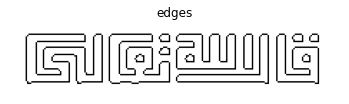

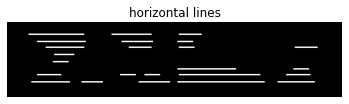

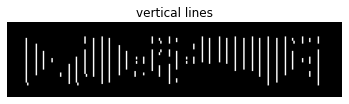

number of horizontal lines:24
number of vertical lines:54


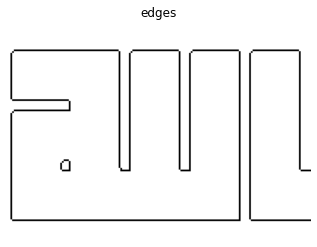

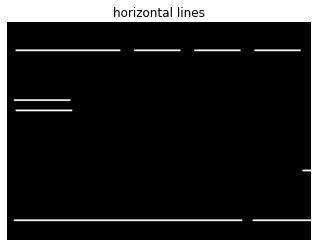

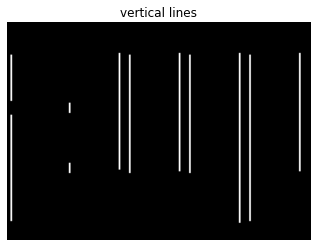

number of horizontal lines:9
number of vertical lines:11


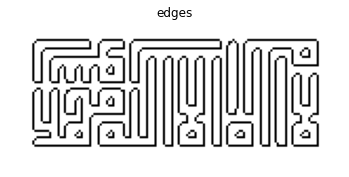

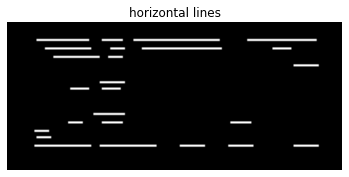

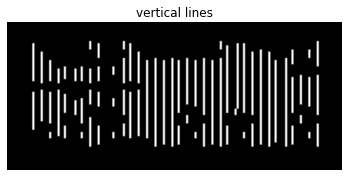

number of horizontal lines:25
number of vertical lines:73


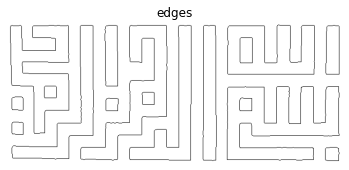

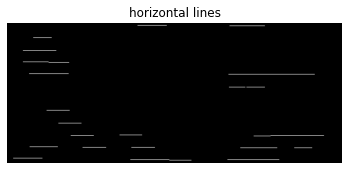

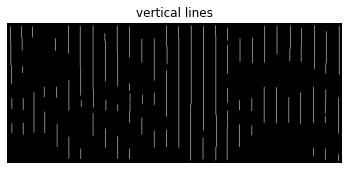

number of horizontal lines:22
number of vertical lines:77


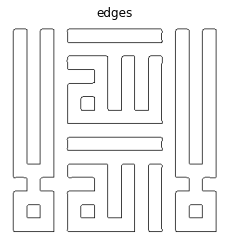

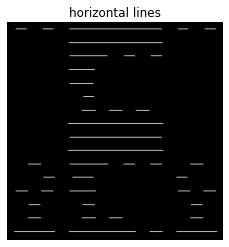

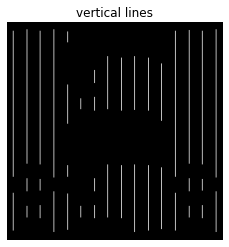

number of horizontal lines:42
number of vertical lines:40


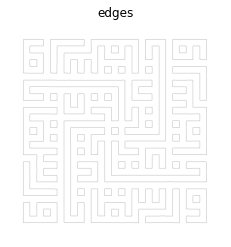

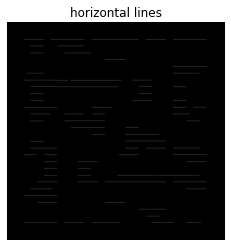

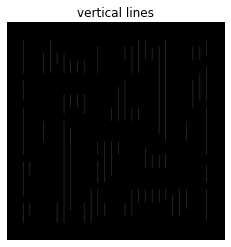

number of horizontal lines:74
number of vertical lines:69


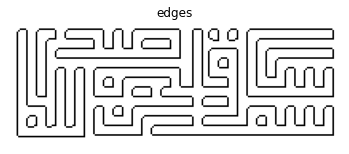

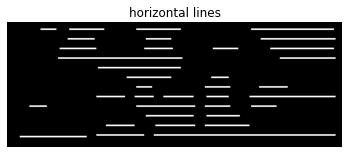

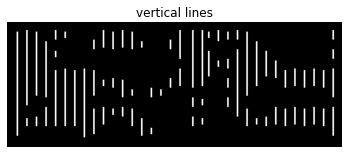

number of horizontal lines:36
number of vertical lines:76


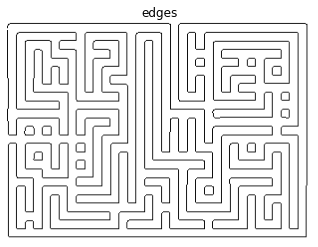

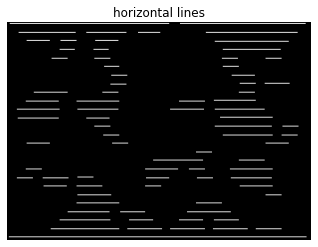

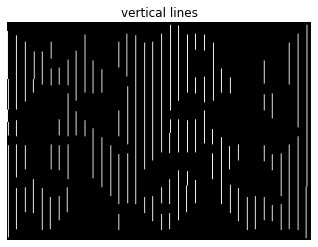

number of horizontal lines:81
number of vertical lines:92


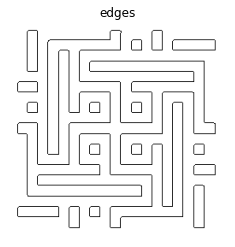

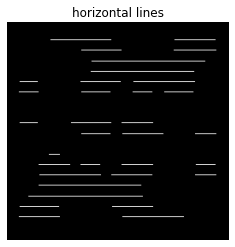

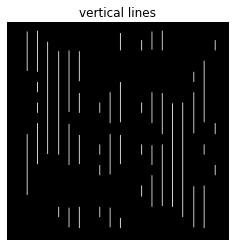

number of horizontal lines:33
number of vertical lines:49


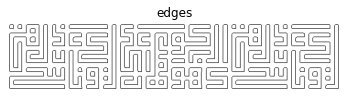

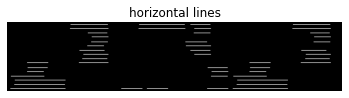

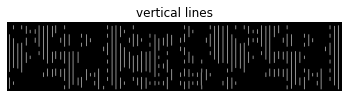

number of horizontal lines:48
number of vertical lines:197


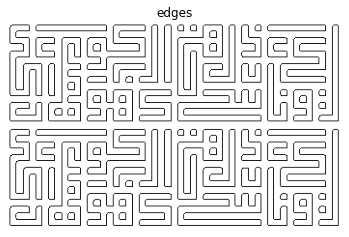

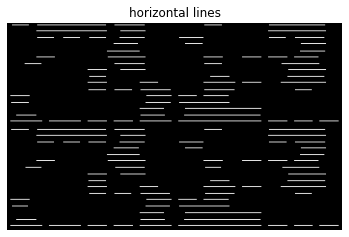

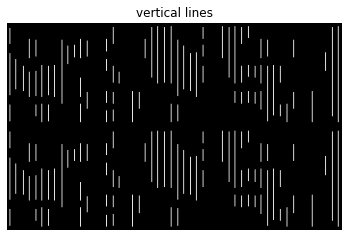

number of horizontal lines:134
number of vertical lines:150


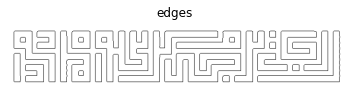

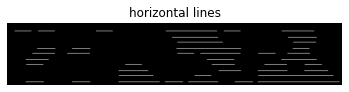

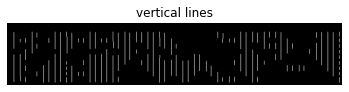

number of horizontal lines:42
number of vertical lines:112


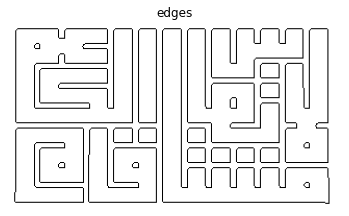

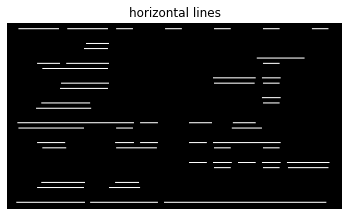

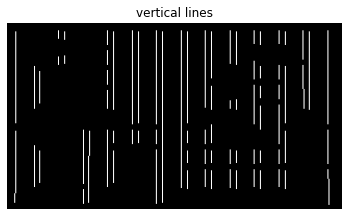

number of horizontal lines:55
number of vertical lines:78


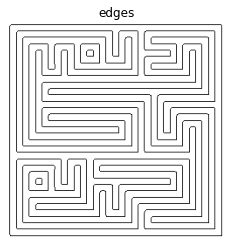

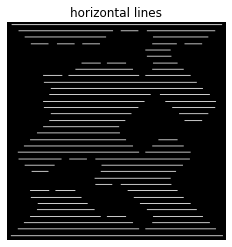

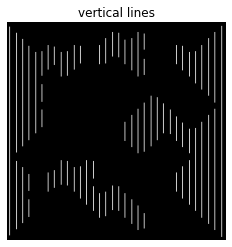

number of horizontal lines:68
number of vertical lines:70


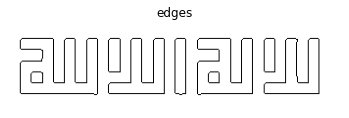

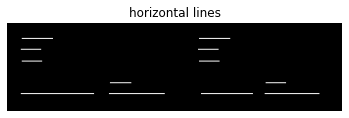

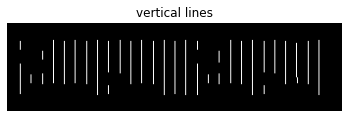

number of horizontal lines:12
number of vertical lines:34


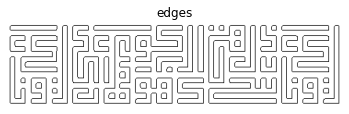

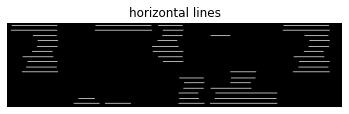

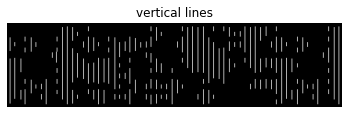

number of horizontal lines:47
number of vertical lines:163


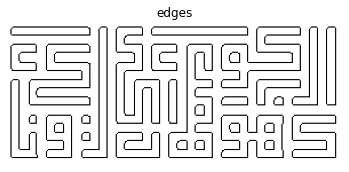

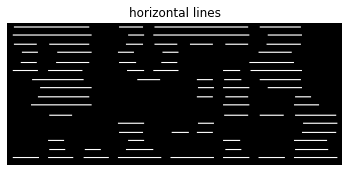

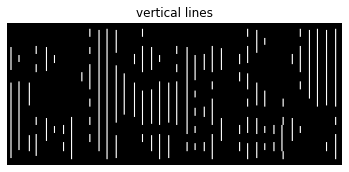

number of horizontal lines:75
number of vertical lines:98


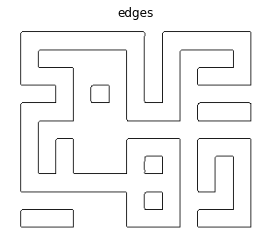

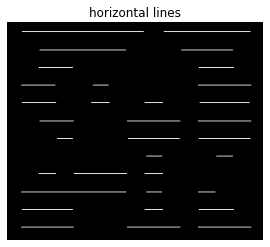

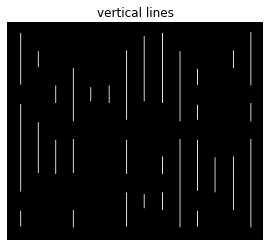

number of horizontal lines:33
number of vertical lines:32


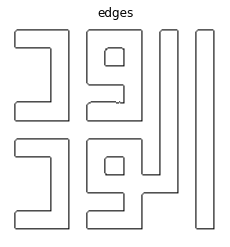

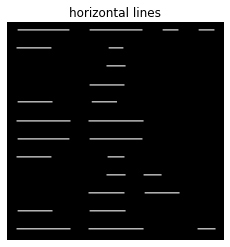

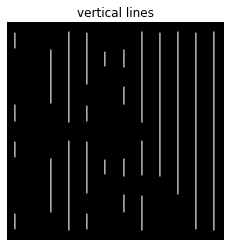

number of horizontal lines:25
number of vertical lines:25


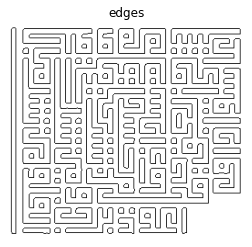

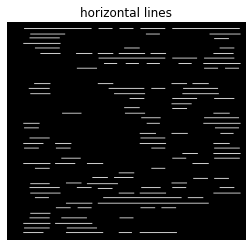

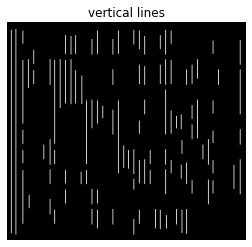

number of horizontal lines:122
number of vertical lines:107


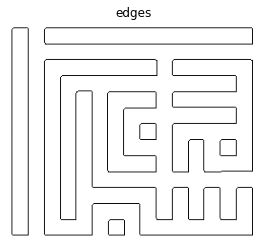

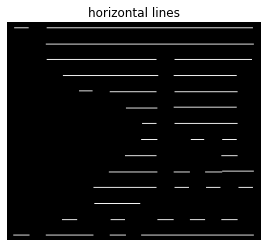

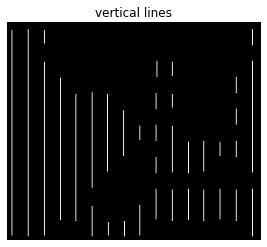

number of horizontal lines:36
number of vertical lines:36


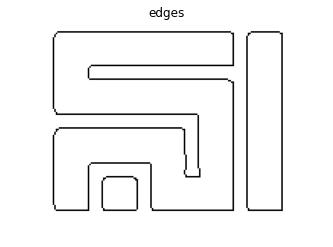

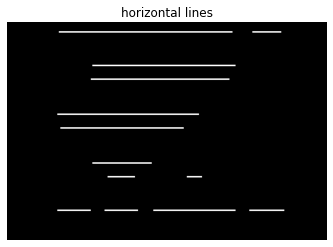

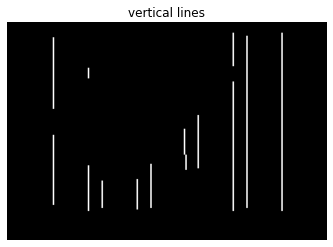

number of horizontal lines:13
number of vertical lines:13


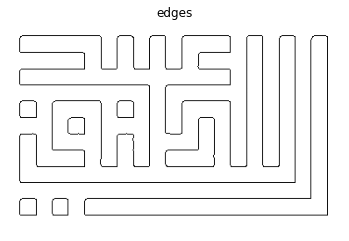

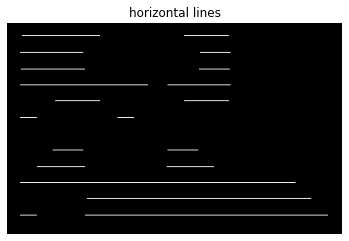

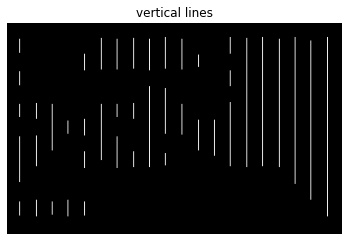

number of horizontal lines:20
number of vertical lines:43


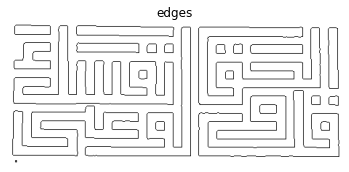

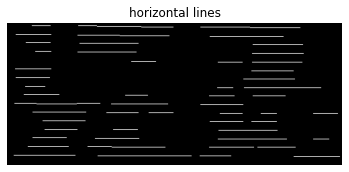

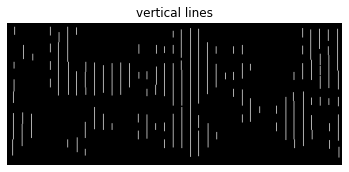

number of horizontal lines:53
number of vertical lines:96


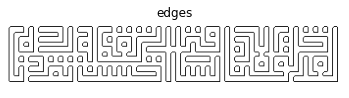

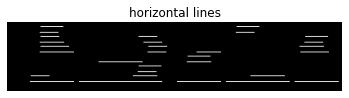

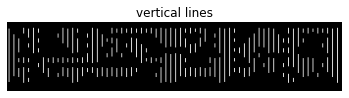

number of horizontal lines:30
number of vertical lines:169


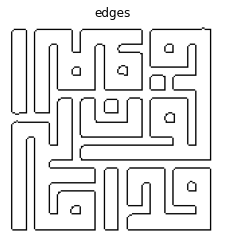

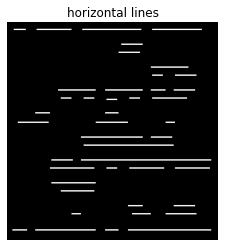

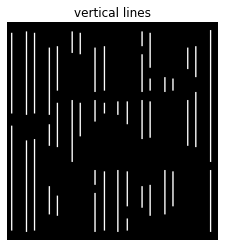

number of horizontal lines:43
number of vertical lines:46


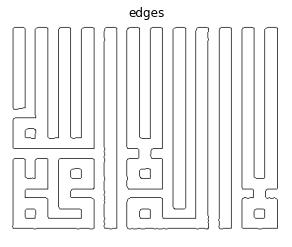

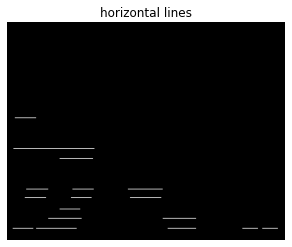

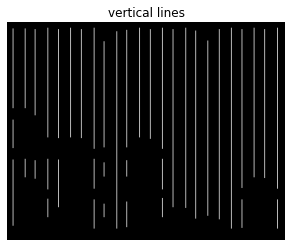

number of horizontal lines:17
number of vertical lines:41


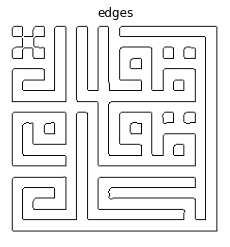

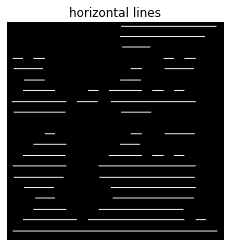

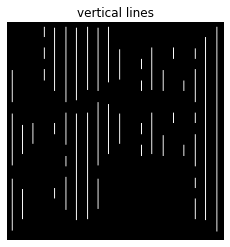

number of horizontal lines:45
number of vertical lines:47


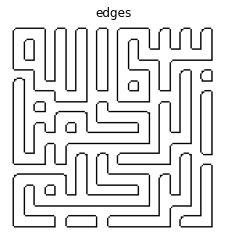

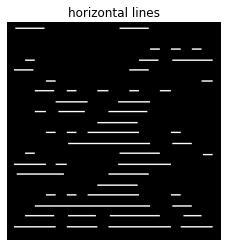

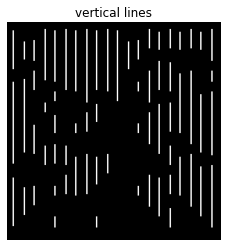

number of horizontal lines:52
number of vertical lines:67


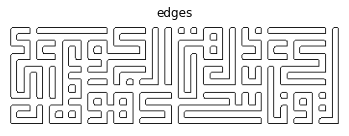

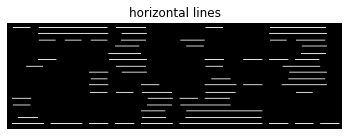

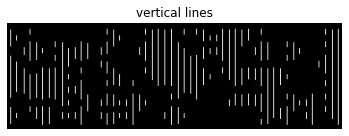

number of horizontal lines:67
number of vertical lines:136


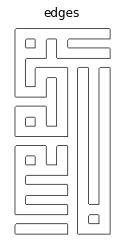

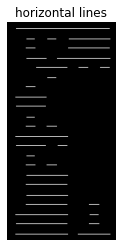

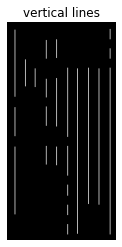

number of horizontal lines:35
number of vertical lines:23


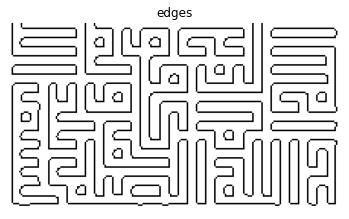

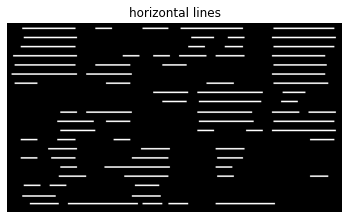

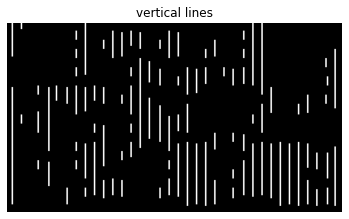

number of horizontal lines:77
number of vertical lines:101


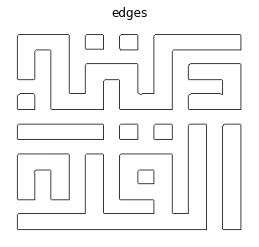

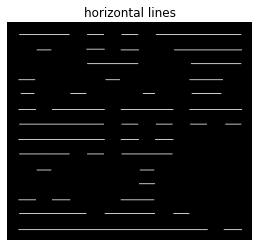

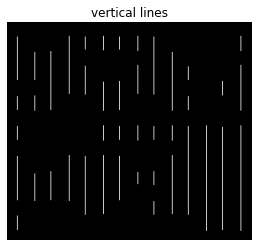

number of horizontal lines:43
number of vertical lines:43


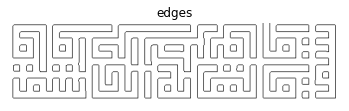

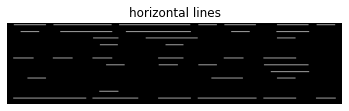

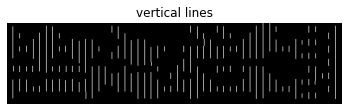

number of horizontal lines:38
number of vertical lines:133


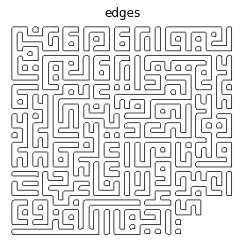

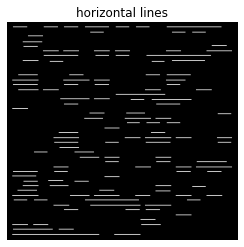

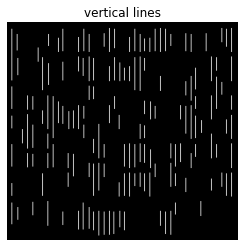

number of horizontal lines:127
number of vertical lines:156


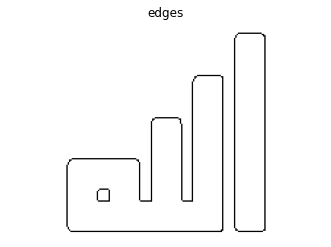

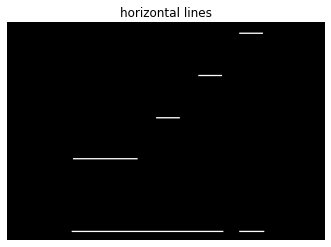

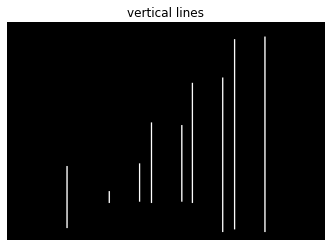

number of horizontal lines:6
number of vertical lines:9


In [224]:
for random_index in np.random.randint(0, 1683, 100):
    binaryImage = binraization(X[random_index])
    edges, skeleton, textOnly, diacritics = extractImagesSet(binaryImage//255)

    # plt.imshow(binaryImage, 'gray')
    # plt.title('binary image')
    # plt.axis("off")
    # plt.show()


    plt.imshow(edges, 'gray')
    plt.title('edges')
    plt.axis("off")
    plt.show()

    horizontal = np.copy(1-edges)
    vertical = np.copy(1-edges)

    cols = horizontal.shape[1]
    horizontal_size = cols // 20
    horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
    horizontal = cv2.morphologyEx(horizontal, cv2.MORPH_OPEN, horizontalStructure)

    rows = vertical.shape[0]
    verticalsize = rows // 20
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
    vertical = cv2.morphologyEx(vertical, cv2.MORPH_OPEN, verticalStructure)

    show_images([horizontal], ['horizontal lines'])
    show_images([vertical], ['vertical lines'])

    HL = cv2.connectedComponents(horizontal)[0]-1
    VL = cv2.connectedComponents(vertical)[0]-1

    print(f'number of horizontal lines:{HL}')
    print(f'number of vertical lines:{VL}')

In [181]:
VL = cv2.connectedComponents(vertical)[0]-1

# for i in range(0, numLabels):
#     if i == 0:
#         text = "examining component {}/{} (background)".format(
#             i + 1, numLabels)
#     else:
#         text = "examining component {}/{}".format( i + 1, numLabels)
    
#     print("[INFO] {}".format(text))
    
#     x = stats[i, cv2.CC_STAT_LEFT]
#     y = stats[i, cv2.CC_STAT_TOP]
#     w = stats[i, cv2.CC_STAT_WIDTH]
#     h = stats[i, cv2.CC_STAT_HEIGHT]
#     area = stats[i, cv2.CC_STAT_AREA]
#     (cX, cY) = centroids[i]

#     output = cv2.cvtColor(vertical*255, cv2.COLOR_GRAY2BGR)
#     cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
#     cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    
#     show_images([output], [f'component #{i}'])
    

ValueError: not enough values to unpack (expected 4, got 2)

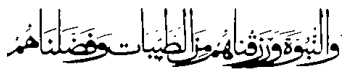

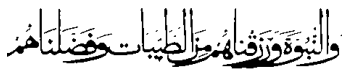

In [85]:

random_index = np.random.randint(0, 1683)
img = X[random_index].copy()
plt.figure()
plt.imshow(img, 'gray')
plt.axis("off")
plt.show()

binaryImage = binraization(img)
plt.figure()
plt.imshow(binaryImage, 'gray')
plt.axis("off")
plt.show()



In [90]:
feature_dim = 360
features = np.zeros((X.shape[0], feature_dim))
for i in range(X.shape[0]):
    X[i] = binraization(X[i])

#     edges, skeleton, textOnly, diacritics = extractImagesSet(X[i] // 255)
    features[i] = extract_EOH(X[i], feature_dim)

# features, labels = [], []

# for i in range(X.shape[0]):
#     X[i] = binraization(X[i])
# #     Xi_textOnly, _ = diacriticsSegmentationClustering(X[i]//255)
#     features.append(extract_hog_features(X[i]))
# #     features.append(extract_hog_features(Xi_textOnly*255))
# #     labels.append(Y[i])
# #     labels.append(Y[i])

# features = np.asarray(features)
# # labels = np.asarray(labels)
# print(features.shape)
# # print(labels.shape)

In [88]:
# print(X_train.shape, Y_train.shape)
# print(X_valid.shape, Y_valid.shape)
# print(X_test.shape, Y_test.shape)

# features, labels = [], []

# for i in range(X_train.shape[0]):
#     X_train[i] = binraization(X_train[i])
#     Xi_textOnly, _ = diacriticsSegmentationClustering(X_train[i]//255)
#     features.append(extract_hog_features(X_train[i]))
#     features.append(extract_hog_features(Xi_textOnly*255))
#     labels.append(Y_train[i])
#     labels.append(Y_train[i])

# features = np.asarray(features)
# labels = np.asarray(labels)

# features_valid, labels_valid = [], []

# for i in range(X_valid.shape[0]):
#     X_valid[i] = binraization(X_valid[i])
#     Xi_textOnly, _ = diacriticsSegmentationClustering(X_valid[i]//255)
#     features_valid.append(extract_hog_features(X_valid[i]))
#     features_valid.append(extract_hog_features(Xi_textOnly*255))
#     labels_valid.append(Y_valid[i])
#     labels_valid.append(Y_valid[i])


# features_valid = np.asarray(features_valid)
# labels_valid = np.asarray(labels_valid)
    
# features_test, labels_test = [], []

# for i in range(X_test.shape[0]):
#     X_test[i] = binraization(X_test[i])
#     Xi_textOnly, _ = diacriticsSegmentationClustering(X_test[i]//255)
#     features_test.append(extract_hog_features(X_test[i]))
#     features_test.append(extract_hog_features(Xi_textOnly*255))
#     labels_test.append(Y_test[i])
#     labels_test.append(Y_test[i])

# features_test = np.asarray(features_test)
# labels_test = np.asarray(labels_test)

# print(features.shape, labels.shape)
# print(features_valid.shape, labels_valid.shape)
# print(features_test.shape, labels_test.shape)

In [160]:
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = split_data(features, Y)

X_train = torch.from_numpy(X_train)
print(X_train.shape)
Y_train = torch.from_numpy(Y_train)
print(Y_train.shape)
X_valid = torch.from_numpy(X_valid)
print(X_valid.shape)
Y_valid = torch.from_numpy(Y_valid)
print(Y_valid.shape)
X_test = torch.from_numpy(X_test)
print(X_test.shape)
Y_test = torch.from_numpy(Y_test)
print(Y_test.shape)

torch.Size([1010, 360])
torch.Size([1010])
torch.Size([337, 360])
torch.Size([337])
torch.Size([337, 360])
torch.Size([337])


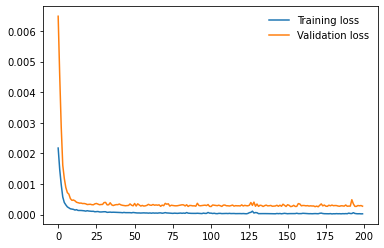

training accuracy = 98.41584158415841%
validation accuracy = 99.10979228486647%
test accuracy = 99.40652818991099%


In [162]:
from nn_utils import *

model = nn.Sequential(nn.Linear(feature_dim, 1024),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(1024, 512),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(512, 9),
                    nn.LogSoftmax(dim=1))

train_losses, validation_losses =\
    nn_train(model, X_train, Y_train, X_valid, Y_valid, epochs=2000, lr=0.01, validate_every=10, debug=False)

plt.plot(train_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()


model.load_state_dict(torch.load('model.pth'))
train_predictions = nn_predict(model, X_train)
validation_predictions = nn_predict(model, X_valid)
test_predictions = nn_predict(model, X_test)

print(f'training accuracy = {nn_accuracy(train_predictions, Y_train) * 100}%')
print(f'validation accuracy = {nn_accuracy(validation_predictions, Y_valid) * 100}%')
print(f'test accuracy = {nn_accuracy(test_predictions, Y_test) * 100}%')

In [161]:
model.load_state_dict(torch.load('best_model.pth'))

train_predictions = nn_predict(model, X_train)
validation_predictions = nn_predict(model, X_valid)
test_predictions = nn_predict(model, X_test)

print(f'training accuracy = {nn_accuracy(train_predictions, Y_train) * 100}%')
print(f'validation accuracy = {nn_accuracy(validation_predictions, Y_valid) * 100}%')
print(f'test accuracy = {nn_accuracy(test_predictions, Y_test) * 100}%')

training accuracy = 98.8118811881188%
validation accuracy = 99.10979228486647%
test accuracy = 99.10979228486647%


In [50]:
from sklearn import svm, metrics

poly = svm.SVC(kernel = 'poly', C=1, degree=4, decision_function_shape='ovo').fit(X_train, Y_train)

train_predictions = poly.predict(X_train)
validation_predictions = poly.predict(X_valid)
test_predictions = poly.predict(X_test)

print(f'training accuracy = {metrics.accuracy_score(Y_train, train_predictions) * 100}%')
print(f'validation accuracy = {metrics.accuracy_score(Y_valid, validation_predictions) * 100}%')
print(f'test accuracy = {metrics.accuracy_score(Y_test, test_predictions) * 100}%')

training accuracy = 94.75247524752474%
validation accuracy = 93.76854599406528%
test accuracy = 92.87833827893175%
